In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
t_data = pd.read_csv("train_loan_data (1).csv")

In [3]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  object 
 3   emp_length            75412 non-null  object 
 4   emp_title             74982 non-null  object 
 5   fico_range_high       80000 non-null  int64  
 6   fico_range_low        80000 non-null  int64  
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  int64  
 13  num_actv_bc_tl        76052 non-null  float64
 14  mort_acc              77229 non-null  float64
 15  tot_cur_bal        

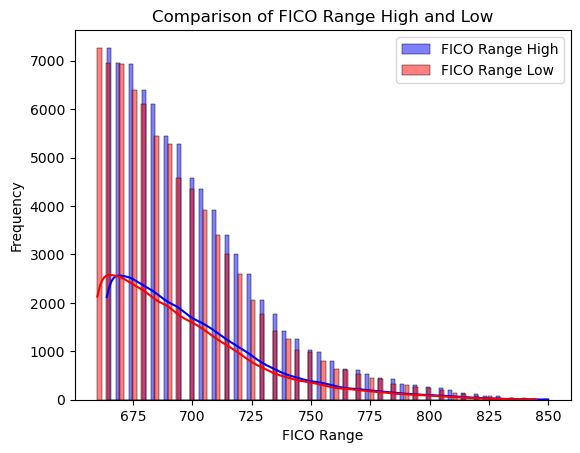

In [4]:
sns.histplot(data=t_data, x='fico_range_high', kde=True, color='blue', label='FICO Range High')
sns.histplot(data=t_data, x='fico_range_low', kde=True, color='red', label='FICO Range Low')
plt.title('Comparison of FICO Range High and Low')
plt.xlabel('FICO Range')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [5]:
t_data.head() 

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,Jul-97,10+ years,Deputy,744,740,E,MORTGAGE,Individual,...,0.0,debt_consolidation,5338,93.6,E1,60 months,Debt consolidation,8,Source Verified,Defaulted
1,CA,40000.0,Apr-87,10+ years,Department of Veterans Affairs,724,720,B,RENT,Individual,...,0.0,debt_consolidation,19944,60.3,B1,36 months,Credit Loan,12,Verified,Paid
2,FL,60000.0,Aug-07,10+ years,Marble polishing,679,675,B,MORTGAGE,Individual,...,0.0,debt_consolidation,23199,88.5,B5,36 months,Debt consolidation,16,Source Verified,Paid
3,IL,100742.0,Sep-80,10+ years,printer,664,660,B,MORTGAGE,Individual,...,0.0,debt_consolidation,18425,69.0,B2,36 months,Debt consolidation,19,Source Verified,Paid
4,MD,80000.0,Jul-99,10+ years,Southern Mgmt,669,665,F,RENT,Individual,...,0.0,debt_consolidation,34370,90.0,F5,60 months,Debt Connsolidation,59,Verified,Paid


In [6]:
t_data['emp_length'].unique()

array(['10+ years', nan, '3 years', '< 1 year', '1 year', '8 years',
       '7 years', '4 years', '2 years', '5 years', '6 years', '9 years'],
      dtype=object)

In [7]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[['0', '< 1 year', '1 year', '2 years', '3 years', '4 years',
                                      '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']])

# Replace NaN values with a new category '0'
t_data['emp_length'].fillna('0', inplace=True)

# Reshape the data for encoding
emp_length_encoded = encoder.fit_transform(t_data[['emp_length']])

# Assign encoded values back to the DataFrame
t_data['emp_length'] = emp_length_encoded

# Verify the changes
print(t_data['emp_length'].unique())

[11.  0.  4.  1.  2.  9.  8.  5.  3.  6.  7. 10.]


In [8]:
t_data['emp_length'].mode()

0    11.0
Name: emp_length, dtype: float64

In [9]:
t_data['emp_length'].mean()

6.5656875

In [10]:
t_data['emp_length'].median()

7.0

In [11]:
t_data['emp_length'].value_counts()

emp_length
11.0    26278
3.0      7319
4.0      6474
1.0      6297
2.0      5294
6.0      5094
5.0      4763
0.0      4588
7.0      3691
8.0      3597
9.0      3583
10.0     3022
Name: count, dtype: int64

In [12]:
t_data['emp_length'].replace(0, 11, inplace=True)

# Verify the changes
print(t_data['emp_length'].unique())

[11.  4.  1.  2.  9.  8.  5.  3.  6.  7. 10.]


In [13]:
t_data['emp_length'].value_counts()

emp_length
11.0    30866
3.0      7319
4.0      6474
1.0      6297
2.0      5294
6.0      5094
5.0      4763
7.0      3691
8.0      3597
9.0      3583
10.0     3022
Name: count, dtype: int64

In [14]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  object 
 3   emp_length            80000 non-null  float64
 4   emp_title             74982 non-null  object 
 5   fico_range_high       80000 non-null  int64  
 6   fico_range_low        80000 non-null  int64  
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  int64  
 13  num_actv_bc_tl        76052 non-null  float64
 14  mort_acc              77229 non-null  float64
 15  tot_cur_bal        

In [15]:
t_data['num_actv_bc_tl'].unique()

array([ 1.,  4., 14., nan,  2.,  3.,  6.,  5.,  8.,  0.,  9.,  7., 11.,
       10., 17., 13., 12., 19., 25., 16., 15., 20., 18., 24., 21., 22.,
       26., 27., 32.])

In [16]:
t_data['num_actv_bc_tl'].mode()

0    3.0
Name: num_actv_bc_tl, dtype: float64

In [17]:
t_data['num_actv_bc_tl'].value_counts()

num_actv_bc_tl
3.0     16176
2.0     15722
4.0     12483
1.0      8824
5.0      8426
6.0      5246
7.0      3032
8.0      1762
0.0      1662
9.0      1085
10.0      665
11.0      386
12.0      219
13.0      143
14.0       77
15.0       46
16.0       31
17.0       24
18.0       14
19.0        9
21.0        6
22.0        4
20.0        3
26.0        3
25.0        1
24.0        1
27.0        1
32.0        1
Name: count, dtype: int64

In [18]:
t_data['num_actv_bc_tl'].fillna(3.0, inplace=True)
t_data['num_actv_bc_tl'].value_counts()

num_actv_bc_tl
3.0     20124
2.0     15722
4.0     12483
1.0      8824
5.0      8426
6.0      5246
7.0      3032
8.0      1762
0.0      1662
9.0      1085
10.0      665
11.0      386
12.0      219
13.0      143
14.0       77
15.0       46
16.0       31
17.0       24
18.0       14
19.0        9
21.0        6
22.0        4
20.0        3
26.0        3
25.0        1
24.0        1
27.0        1
32.0        1
Name: count, dtype: int64

In [19]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  object 
 3   emp_length            80000 non-null  float64
 4   emp_title             74982 non-null  object 
 5   fico_range_high       80000 non-null  int64  
 6   fico_range_low        80000 non-null  int64  
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  int64  
 13  num_actv_bc_tl        80000 non-null  float64
 14  mort_acc              77229 non-null  float64
 15  tot_cur_bal        

In [20]:
t_data['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2.,  3.,  5., nan,  4.,  7.,  6.])

In [21]:
t_data['pub_rec_bankruptcies'].mode()

0    0.0
Name: pub_rec_bankruptcies, dtype: float64

In [22]:
t_data['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    69862
1.0     9464
2.0      483
3.0      118
4.0       33
5.0        7
7.0        1
6.0        1
Name: count, dtype: int64

In [23]:
t_data['pub_rec_bankruptcies'].fillna(0.0, inplace=True)
t_data['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    69893
1.0     9464
2.0      483
3.0      118
4.0       33
5.0        7
7.0        1
6.0        1
Name: count, dtype: int64

In [24]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  object 
 3   emp_length            80000 non-null  float64
 4   emp_title             74982 non-null  object 
 5   fico_range_high       80000 non-null  int64  
 6   fico_range_low        80000 non-null  int64  
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  int64  
 13  num_actv_bc_tl        80000 non-null  float64
 14  mort_acc              77229 non-null  float64
 15  tot_cur_bal        

In [25]:
t_data['mort_acc'].unique()

array([ 1.,  0.,  2.,  7.,  4., nan,  3.,  5.,  8., 12.,  9.,  6., 10.,
       11., 13., 16., 14., 26., 18., 15., 32., 22., 19., 20., 27., 31.,
       17., 24., 29.])

In [26]:
t_data['mort_acc'].mode()

0    0.0
Name: mort_acc, dtype: float64

In [27]:
t_data['mort_acc'].value_counts()

mort_acc
0.0     31079
1.0     13527
2.0     11142
3.0      8339
4.0      5713
5.0      3408
6.0      1967
7.0       997
8.0       509
9.0       268
10.0      118
11.0       60
12.0       34
13.0       20
15.0       12
14.0       12
16.0        8
18.0        3
26.0        2
20.0        2
24.0        2
32.0        1
22.0        1
19.0        1
27.0        1
31.0        1
17.0        1
29.0        1
Name: count, dtype: int64

In [28]:
t_data['mort_acc'].fillna(0.0,inplace=True)

In [29]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  object 
 3   emp_length            80000 non-null  float64
 4   emp_title             74982 non-null  object 
 5   fico_range_high       80000 non-null  int64  
 6   fico_range_low        80000 non-null  int64  
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  int64  
 13  num_actv_bc_tl        80000 non-null  float64
 14  mort_acc              80000 non-null  float64
 15  tot_cur_bal        

In [30]:
t_data['tot_cur_bal'].mode()

0    0.0
Name: tot_cur_bal, dtype: float64

In [31]:
t_data['tot_cur_bal'].unique()

array([ 319479.,   19944.,   23199., ...,  382274.,  201841., 3046776.])

In [32]:
t_data['tot_cur_bal'].value_counts()

tot_cur_bal
0.0          22
22946.0       5
12213.0       5
51409.0       5
10772.0       5
             ..
288867.0      1
294866.0      1
34023.0       1
40420.0       1
3046776.0     1
Name: count, Length: 65410, dtype: int64

In [33]:
t_data['revol_util'].mode()

0    0.0
Name: revol_util, dtype: float64

In [34]:
t_data['revol_util'].unique()

array([ 93.6,  60.3,  88.5, ..., 108. , 121.5, 113. ])

In [35]:
t_data['revol_util'].value_counts()

revol_util
0.0      409
64.0     176
54.0     171
62.0     168
61.0     164
        ... 
114.2      1
109.1      1
107.2      1
103.6      1
113.0      1
Name: count, Length: 1080, dtype: int64

In [36]:
t_data['revol_util'].fillna(0.0,inplace =True)

In [37]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  object 
 3   emp_length            80000 non-null  float64
 4   emp_title             74982 non-null  object 
 5   fico_range_high       80000 non-null  int64  
 6   fico_range_low        80000 non-null  int64  
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  int64  
 13  num_actv_bc_tl        80000 non-null  float64
 14  mort_acc              80000 non-null  float64
 15  tot_cur_bal        

In [38]:
t_data['title'].mode()

0    Debt consolidation
Name: title, dtype: object

In [39]:
t_data['title'].fillna('Debt consolidation', inplace=True)


In [40]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  object 
 3   emp_length            80000 non-null  float64
 4   emp_title             74982 non-null  object 
 5   fico_range_high       80000 non-null  int64  
 6   fico_range_low        80000 non-null  int64  
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  int64  
 13  num_actv_bc_tl        80000 non-null  float64
 14  mort_acc              80000 non-null  float64
 15  tot_cur_bal        

In [41]:
t_data.dropna(subset=['tot_cur_bal'], inplace=True)


In [42]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76052 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            76052 non-null  object 
 1   annual_inc            76052 non-null  float64
 2   earliest_cr_line      76052 non-null  object 
 3   emp_length            76052 non-null  float64
 4   emp_title             71271 non-null  object 
 5   fico_range_high       76052 non-null  int64  
 6   fico_range_low        76052 non-null  int64  
 7   grade                 76052 non-null  object 
 8   home_ownership        76052 non-null  object 
 9   application_type      76052 non-null  object 
 10  initial_list_status   76052 non-null  object 
 11  int_rate              76052 non-null  float64
 12  loan_amnt             76052 non-null  int64  
 13  num_actv_bc_tl        76052 non-null  float64
 14  mort_acc              76052 non-null  float64
 15  tot_cur_bal           76

In [43]:
t_data['emp_title'].value_counts().head(30)

emp_title
Teacher                     1278
Manager                     1194
Owner                        592
RN                           526
Registered Nurse             517
Supervisor                   511
Sales                        462
Driver                       426
Project Manager              355
Office Manager               344
owner                        297
General Manager              296
manager                      292
Director                     274
Engineer                     258
President                    236
teacher                      235
Vice President               211
driver                       207
Operations Manager           207
Attorney                     197
Accountant                   181
Administrative Assistant     176
Sales Manager                175
Truck Driver                 170
Account Manager              167
Nurse                        166
Police Officer               160
Technician                   156
Analyst                      149


In [44]:
t_data['addr_state'].value_counts()

addr_state
CA    11018
TX     6233
NY     6089
FL     5327
IL     2948
NJ     2695
PA     2541
OH     2431
GA     2406
NC     2185
VA     2116
MI     2021
AZ     1893
MA     1740
MD     1726
CO     1711
WA     1641
MN     1368
IN     1327
MO     1223
TN     1205
NV     1170
CT     1065
WI      999
OR      988
SC      958
AL      937
LA      877
KY      802
OK      689
KS      623
AR      560
UT      522
NM      425
HI      383
MS      373
NH      354
RI      332
WV      257
NE      239
MT      221
DE      212
AK      198
DC      187
SD      184
WY      181
VT      172
ME      110
ID      105
ND       85
Name: count, dtype: int64

In [45]:
t_data['earliest_cr_line'].value_counts()

earliest_cr_line
Aug-01    526
Aug-03    525
Sep-03    518
Oct-01    517
Sep-02    516
         ... 
Apr-55      1
Oct-61      1
Nov-62      1
Jul-15      1
Jan-59      1
Name: count, Length: 637, dtype: int64

In [46]:
t_data.drop(columns=['emp_title','fico_range_high','grade','sub_grade'], inplace=True)


In [47]:
t_data['purpose'].value_counts()

purpose
debt_consolidation    44428
credit_card           16891
home_improvement       4959
other                  4359
major_purchase         1569
medical                 848
small_business          797
car                     750
moving                  504
vacation                484
house                   377
renewable_energy         44
wedding                  42
Name: count, dtype: int64

In [48]:
t_data['term'].value_counts()

term
 36 months    57786
 60 months    18266
Name: count, dtype: int64

In [49]:
t_data['home_ownership'].value_counts()        

home_ownership
MORTGAGE    37893
RENT        29771
OWN          8363
ANY            19
NONE            4
OTHER           2
Name: count, dtype: int64

In [50]:
t_data['application_type'].value_counts()      

application_type
Individual    74498
Joint App      1554
Name: count, dtype: int64

In [51]:
t_data['initial_list_status'].value_counts()

initial_list_status
w    46745
f    29307
Name: count, dtype: int64

In [52]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76052 entries, 0 to 79999
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            76052 non-null  object 
 1   annual_inc            76052 non-null  float64
 2   earliest_cr_line      76052 non-null  object 
 3   emp_length            76052 non-null  float64
 4   fico_range_low        76052 non-null  int64  
 5   home_ownership        76052 non-null  object 
 6   application_type      76052 non-null  object 
 7   initial_list_status   76052 non-null  object 
 8   int_rate              76052 non-null  float64
 9   loan_amnt             76052 non-null  int64  
 10  num_actv_bc_tl        76052 non-null  float64
 11  mort_acc              76052 non-null  float64
 12  tot_cur_bal           76052 non-null  float64
 13  open_acc              76052 non-null  int64  
 14  pub_rec               76052 non-null  int64  
 15  pub_rec_bankruptcies  76

In [53]:
month_day = t_data['earliest_cr_line'].str.split('-', expand=True)

# Display the resulting DataFrame
print(month_day)

         0   1
0      Jul  97
1      Apr  87
2      Aug  07
3      Sep  80
4      Jul  99
...    ...  ..
79995  Feb  00
79996  Aug  95
79997  Apr  05
79998  Apr  92
79999  Jun  99

[76052 rows x 2 columns]


In [54]:
month_only = t_data['earliest_cr_line'].str.split('-', expand=True)[0]

# Rename the resulting column to 'month'
month_only.columns = ['month']
print(month_only)

0        Jul
1        Apr
2        Aug
3        Sep
4        Jul
        ... 
79995    Feb
79996    Aug
79997    Apr
79998    Apr
79999    Jun
Name: 0, Length: 76052, dtype: object


In [55]:
# Split the 'earliest_cr_line' column into 'year' and 'month'
t_data['month'] = t_data['earliest_cr_line'].str.split('-', expand=True)[0]

# Display the resulting DataFrame
t_data['month']


0        Jul
1        Apr
2        Aug
3        Sep
4        Jul
        ... 
79995    Feb
79996    Aug
79997    Apr
79998    Apr
79999    Jun
Name: month, Length: 76052, dtype: object

In [56]:
t_data.drop(columns=['earliest_cr_line'], inplace=True)


In [57]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76052 entries, 0 to 79999
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            76052 non-null  object 
 1   annual_inc            76052 non-null  float64
 2   emp_length            76052 non-null  float64
 3   fico_range_low        76052 non-null  int64  
 4   home_ownership        76052 non-null  object 
 5   application_type      76052 non-null  object 
 6   initial_list_status   76052 non-null  object 
 7   int_rate              76052 non-null  float64
 8   loan_amnt             76052 non-null  int64  
 9   num_actv_bc_tl        76052 non-null  float64
 10  mort_acc              76052 non-null  float64
 11  tot_cur_bal           76052 non-null  float64
 12  open_acc              76052 non-null  int64  
 13  pub_rec               76052 non-null  int64  
 14  pub_rec_bankruptcies  76052 non-null  float64
 15  purpose               76

In [58]:
# Calculate value counts for each state
state_counts = t_data['addr_state'].value_counts()

# Initialize an empty dictionary to store the mapping
state_mapping = {}

# Assign categories based on value counts
category = 0
for state, count in state_counts.items():
    if 0 < count < 1000:
        state_mapping[state] = 0
    elif 1000 < count < 2000:
        state_mapping[state] = 1
    elif 2000 < count < 3000:
        state_mapping[state] = 2
    elif 3000 < count < 7000:
        state_mapping[state] = 3
    else:
        state_mapping[state] = 4

# Map the states to categories in the DataFrame
t_data['state_category'] = t_data['addr_state'].map(state_mapping)


In [59]:
t_data['state_category'].value_counts()

state_category
2    19343
3    17649
1    16069
0    11973
4    11018
Name: count, dtype: int64

In [60]:
t_data.drop(columns=['addr_state'], inplace=True)


In [61]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76052 entries, 0 to 79999
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   annual_inc            76052 non-null  float64
 1   emp_length            76052 non-null  float64
 2   fico_range_low        76052 non-null  int64  
 3   home_ownership        76052 non-null  object 
 4   application_type      76052 non-null  object 
 5   initial_list_status   76052 non-null  object 
 6   int_rate              76052 non-null  float64
 7   loan_amnt             76052 non-null  int64  
 8   num_actv_bc_tl        76052 non-null  float64
 9   mort_acc              76052 non-null  float64
 10  tot_cur_bal           76052 non-null  float64
 11  open_acc              76052 non-null  int64  
 12  pub_rec               76052 non-null  int64  
 13  pub_rec_bankruptcies  76052 non-null  float64
 14  purpose               76052 non-null  object 
 15  revol_bal             76

In [62]:
t_data['month'].value_counts()

month
Sep    7628
Oct    7277
Aug    7263
Nov    6629
Mar    6241
Jul    6145
Dec    6061
Jun    5981
May    5950
Apr    5870
Feb    5622
Jan    5385
Name: count, dtype: int64

In [63]:
# Get the value counts of the 'month' column
month_counts = t_data['month'].value_counts()

# Create a dictionary to map months to categories
month_mapping = {
    'Jan': 0,
    'Feb': 0,
    'Mar': 0,
    'Apr': 0,
    'May': 0,
    'Jun': 0,
    'Jul': 0,
    'Aug': 0,
    'Sep': 0,
    'Oct': 0,
    'Nov': 0,
    'Dec': 0
}

# Assign categories based on value counts
for month, count in month_counts.items():
    if 5000 < count < 6000:
        month_mapping[month] = 1
    elif 6000 < count < 7000:
        month_mapping[month] = 2
    elif count >= 7000:
        month_mapping[month] = 3

# Map the months to categories in the DataFrame
t_data['month_category'] = t_data['month'].map(month_mapping)


In [64]:
t_data['month_category'].value_counts()

month_category
1    28808
2    25076
3    22168
Name: count, dtype: int64

In [65]:
t_data.drop(columns=['month'], inplace=True)


In [66]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76052 entries, 0 to 79999
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   annual_inc            76052 non-null  float64
 1   emp_length            76052 non-null  float64
 2   fico_range_low        76052 non-null  int64  
 3   home_ownership        76052 non-null  object 
 4   application_type      76052 non-null  object 
 5   initial_list_status   76052 non-null  object 
 6   int_rate              76052 non-null  float64
 7   loan_amnt             76052 non-null  int64  
 8   num_actv_bc_tl        76052 non-null  float64
 9   mort_acc              76052 non-null  float64
 10  tot_cur_bal           76052 non-null  float64
 11  open_acc              76052 non-null  int64  
 12  pub_rec               76052 non-null  int64  
 13  pub_rec_bankruptcies  76052 non-null  float64
 14  purpose               76052 non-null  object 
 15  revol_bal             76

In [67]:
t_data['verification_status']

0        Source Verified
1               Verified
2        Source Verified
3        Source Verified
4               Verified
              ...       
79995           Verified
79996       Not Verified
79997    Source Verified
79998    Source Verified
79999    Source Verified
Name: verification_status, Length: 76052, dtype: object

In [68]:
t_data['term'].value_counts()

term
 36 months    57786
 60 months    18266
Name: count, dtype: int64

In [69]:
t_data['title'].value_counts().head(30)

title
Debt consolidation           40258
Credit card refinancing      14782
Home improvement              4522
Other                         4020
Major purchase                1418
Medical expenses               786
Business                       740
Car financing                  662
Debt Consolidation             633
Moving and relocation          466
Vacation                       452
Home buying                    332
Consolidation                  229
debt consolidation             222
consolidation                  124
Credit Card Consolidation      113
Consolidation Loan              81
Personal Loan                   76
Debt Consolidation Loan         73
Consolidate                     70
Credit Card Refinance           68
Credit Card Payoff              64
Home Improvement                58
Loan                            54
Freedom                         43
Green loan                      43
Personal                        38
Debt                            32
Payoff        

In [70]:
# Calculate the value counts for the 'title' column
title_counts = t_data['title'].value_counts()

# Define the mapping of titles to categories
title_mapping = {
    title: 0 for title, count in title_counts.items() if 0 < count <= 1000
}
title_mapping.update({
    title: 1 for title, count in title_counts.items() if 1000 < count <= 5000
})
title_mapping.update({
    title: 2 for title, count in title_counts.items() if 5000 < count <= 20000
})
title_mapping.update({
    title: 3 for title, count in title_counts.items() if count > 20000
})

# Apply the mapping to the 'title' column
t_data['title'] = t_data['title'].map(title_mapping)



In [71]:
t_data['title'].value_counts()

title
3    40258
2    14782
0    11052
1     9960
Name: count, dtype: int64

In [72]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76052 entries, 0 to 79999
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   annual_inc            76052 non-null  float64
 1   emp_length            76052 non-null  float64
 2   fico_range_low        76052 non-null  int64  
 3   home_ownership        76052 non-null  object 
 4   application_type      76052 non-null  object 
 5   initial_list_status   76052 non-null  object 
 6   int_rate              76052 non-null  float64
 7   loan_amnt             76052 non-null  int64  
 8   num_actv_bc_tl        76052 non-null  float64
 9   mort_acc              76052 non-null  float64
 10  tot_cur_bal           76052 non-null  float64
 11  open_acc              76052 non-null  int64  
 12  pub_rec               76052 non-null  int64  
 13  pub_rec_bankruptcies  76052 non-null  float64
 14  purpose               76052 non-null  object 
 15  revol_bal             76

In [73]:
t_data['purpose'].value_counts()

purpose
debt_consolidation    44428
credit_card           16891
home_improvement       4959
other                  4359
major_purchase         1569
medical                 848
small_business          797
car                     750
moving                  504
vacation                484
house                   377
renewable_energy         44
wedding                  42
Name: count, dtype: int64

In [74]:
t_data['initial_list_status'].value_counts()

initial_list_status
w    46745
f    29307
Name: count, dtype: int64

In [75]:
t_data['application_type'].value_counts()

application_type
Individual    74498
Joint App      1554
Name: count, dtype: int64

In [76]:
# Calculate the value counts for the 'purpose' column
purpose_counts = t_data['purpose'].value_counts()

# Define the mapping of purposes to categories
purpose_mapping = {
    purpose: 1 for purpose, count in purpose_counts.items() if count <= 5000
}
purpose_mapping.update({
    purpose: 2 for purpose, count in purpose_counts.items() if 5000 < count <= 20000
})
purpose_mapping.update({
    purpose: 3 for purpose, count in purpose_counts.items() if count > 20000
})

# Apply the mapping to the 'purpose' column
t_data['purpose'] = t_data['purpose'].map(purpose_mapping)


In [77]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76052 entries, 0 to 79999
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   annual_inc            76052 non-null  float64
 1   emp_length            76052 non-null  float64
 2   fico_range_low        76052 non-null  int64  
 3   home_ownership        76052 non-null  object 
 4   application_type      76052 non-null  object 
 5   initial_list_status   76052 non-null  object 
 6   int_rate              76052 non-null  float64
 7   loan_amnt             76052 non-null  int64  
 8   num_actv_bc_tl        76052 non-null  float64
 9   mort_acc              76052 non-null  float64
 10  tot_cur_bal           76052 non-null  float64
 11  open_acc              76052 non-null  int64  
 12  pub_rec               76052 non-null  int64  
 13  pub_rec_bankruptcies  76052 non-null  float64
 14  purpose               76052 non-null  int64  
 15  revol_bal             76

In [78]:
t_data['home_ownership'].value_counts()

home_ownership
MORTGAGE    37893
RENT        29771
OWN          8363
ANY            19
NONE            4
OTHER           2
Name: count, dtype: int64

In [79]:
# Define the mapping of home ownership types to categories
home_ownership_mapping = {
    'ANY': 0,
    'NONE': 0,
    'OTHER': 0,
    'RENT': 1,
    'MORTGAGE': 2,
    'OWN': 3
}

# Apply the mapping to the 'home_ownership' column
t_data['home_ownership'] = t_data['home_ownership'].map(home_ownership_mapping)


In [80]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76052 entries, 0 to 79999
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   annual_inc            76052 non-null  float64
 1   emp_length            76052 non-null  float64
 2   fico_range_low        76052 non-null  int64  
 3   home_ownership        76052 non-null  int64  
 4   application_type      76052 non-null  object 
 5   initial_list_status   76052 non-null  object 
 6   int_rate              76052 non-null  float64
 7   loan_amnt             76052 non-null  int64  
 8   num_actv_bc_tl        76052 non-null  float64
 9   mort_acc              76052 non-null  float64
 10  tot_cur_bal           76052 non-null  float64
 11  open_acc              76052 non-null  int64  
 12  pub_rec               76052 non-null  int64  
 13  pub_rec_bankruptcies  76052 non-null  float64
 14  purpose               76052 non-null  int64  
 15  revol_bal             76

In [81]:
# List of categorical object columns to be one-hot encoded
categorical_cols = ['application_type', 'initial_list_status', 'term', 'verification_status']

# Perform one-hot encoding for each categorical column
for col in categorical_cols:
    one_hot_encoded = pd.get_dummies(t_data[col], prefix=col)
    t_data = pd.concat([t_data, one_hot_encoded], axis=1)
    t_data.drop(col, axis=1, inplace=True)


In [82]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76052 entries, 0 to 79999
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   annual_inc                           76052 non-null  float64
 1   emp_length                           76052 non-null  float64
 2   fico_range_low                       76052 non-null  int64  
 3   home_ownership                       76052 non-null  int64  
 4   int_rate                             76052 non-null  float64
 5   loan_amnt                            76052 non-null  int64  
 6   num_actv_bc_tl                       76052 non-null  float64
 7   mort_acc                             76052 non-null  float64
 8   tot_cur_bal                          76052 non-null  float64
 9   open_acc                             76052 non-null  int64  
 10  pub_rec                              76052 non-null  int64  
 11  pub_rec_bankruptcies             

In [83]:
t_data['application_type_Individual']          

0        True
1        True
2        True
3        True
4        True
         ... 
79995    True
79996    True
79997    True
79998    True
79999    True
Name: application_type_Individual, Length: 76052, dtype: bool

In [84]:
# Specify the columns containing boolean values
bool_columns = ['application_type_Individual', 'application_type_Joint App', 'initial_list_status_f', 'initial_list_status_w', 'term_ 36 months', 'term_ 60 months', 'verification_status_Not Verified', 'verification_status_Source Verified', 'verification_status_Verified']

# Convert boolean columns to binary (0 and 1)
t_data[bool_columns] = t_data[bool_columns].astype(int)


In [85]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76052 entries, 0 to 79999
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   annual_inc                           76052 non-null  float64
 1   emp_length                           76052 non-null  float64
 2   fico_range_low                       76052 non-null  int64  
 3   home_ownership                       76052 non-null  int64  
 4   int_rate                             76052 non-null  float64
 5   loan_amnt                            76052 non-null  int64  
 6   num_actv_bc_tl                       76052 non-null  float64
 7   mort_acc                             76052 non-null  float64
 8   tot_cur_bal                          76052 non-null  float64
 9   open_acc                             76052 non-null  int64  
 10  pub_rec                              76052 non-null  int64  
 11  pub_rec_bankruptcies             

In [86]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the loan_status column
t_data['loan_status'] = label_encoder.fit_transform(t_data['loan_status'])

# Display the DataFrame with encoded loan_status column
t_data['loan_status']


0        0
1        1
2        1
3        1
4        1
        ..
79995    0
79996    1
79997    1
79998    1
79999    1
Name: loan_status, Length: 76052, dtype: int32

In [87]:
t_data['loan_status'].unique()

array([0, 1])

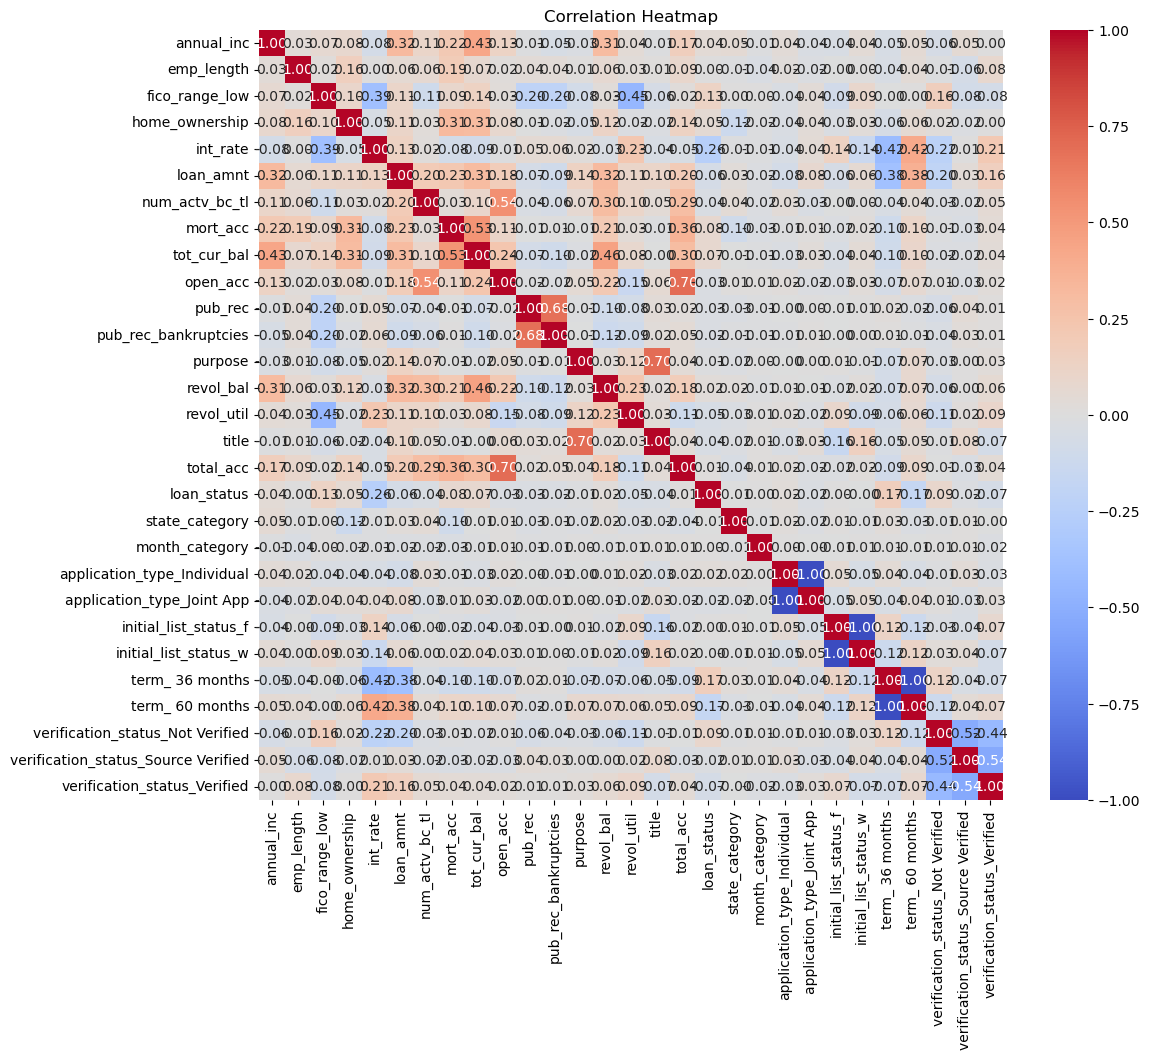

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = t_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


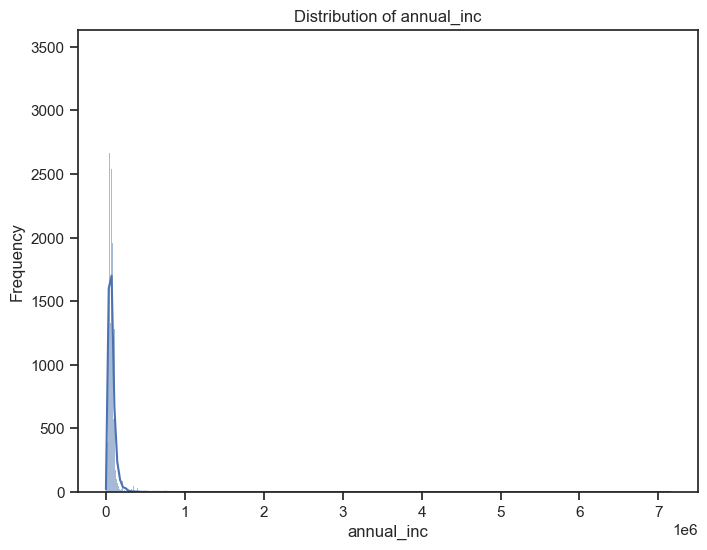

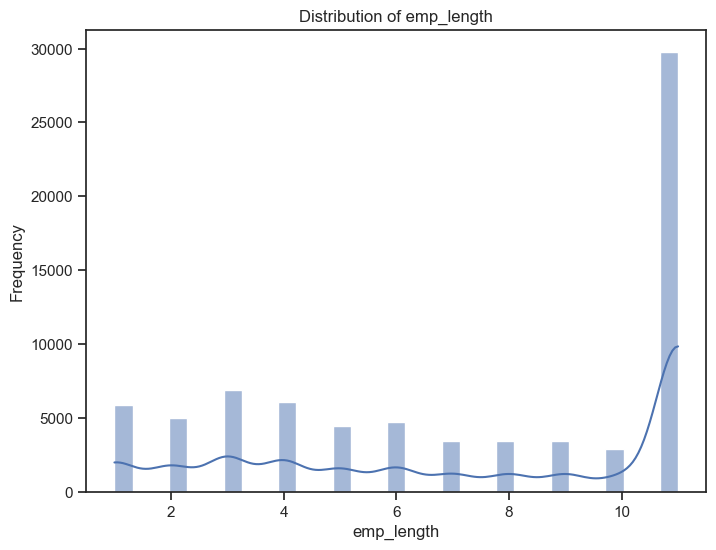

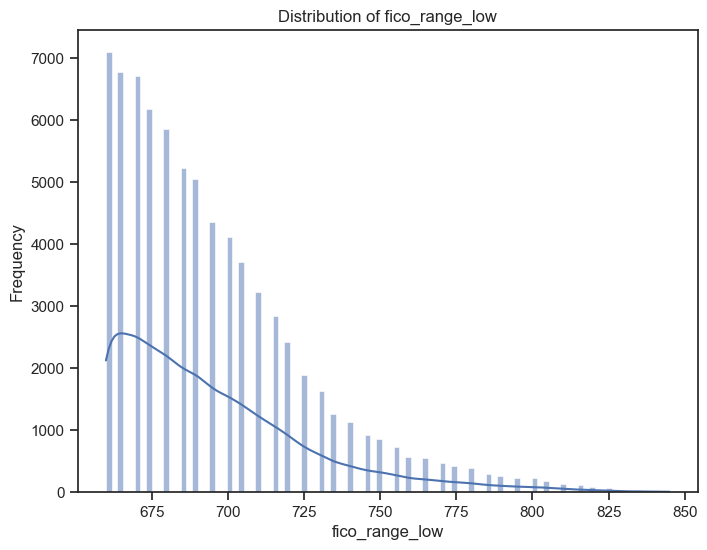

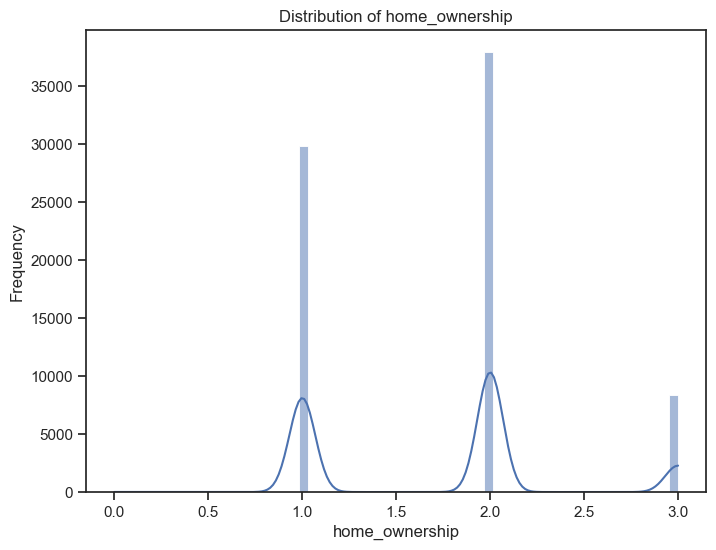

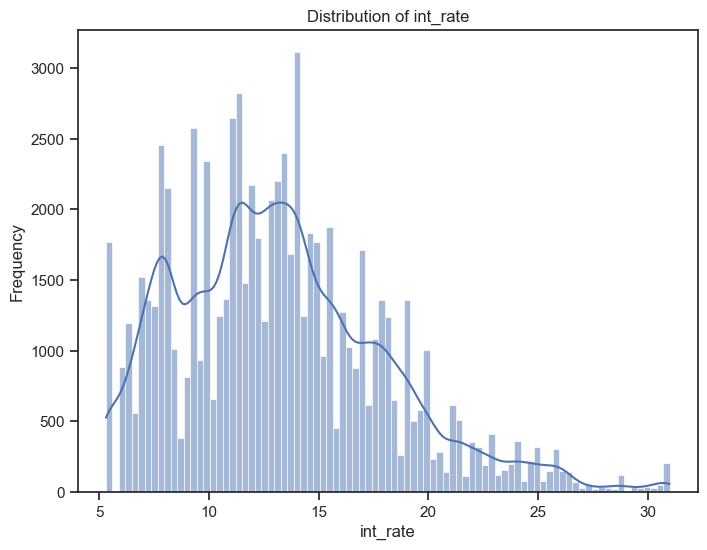

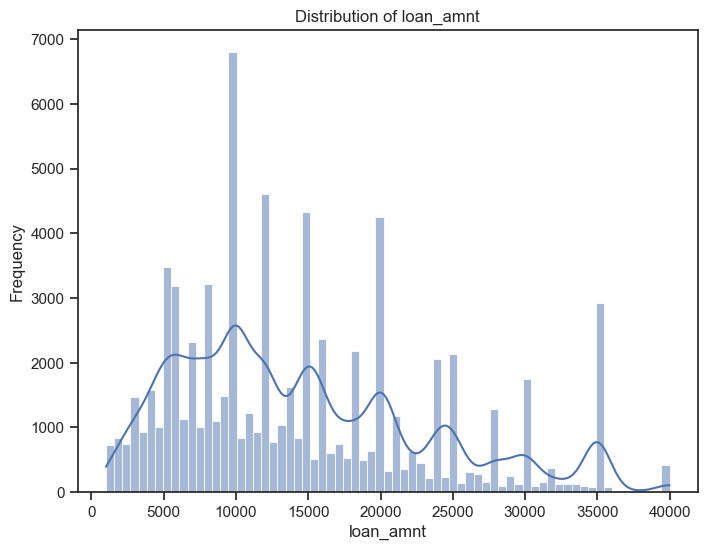

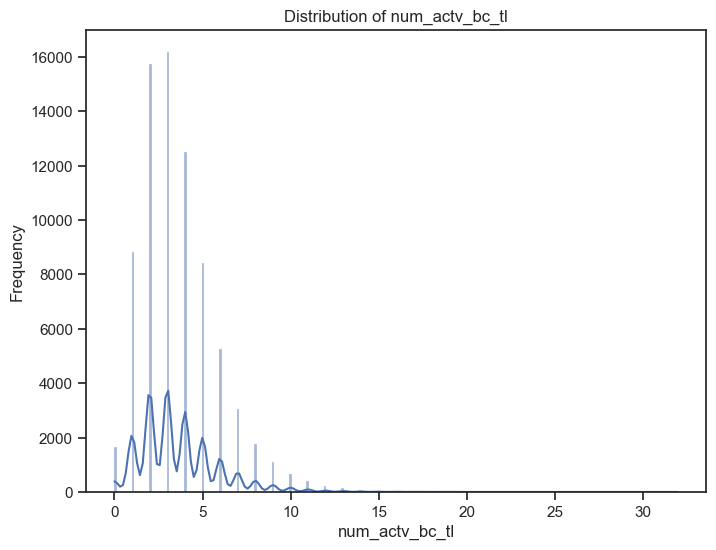

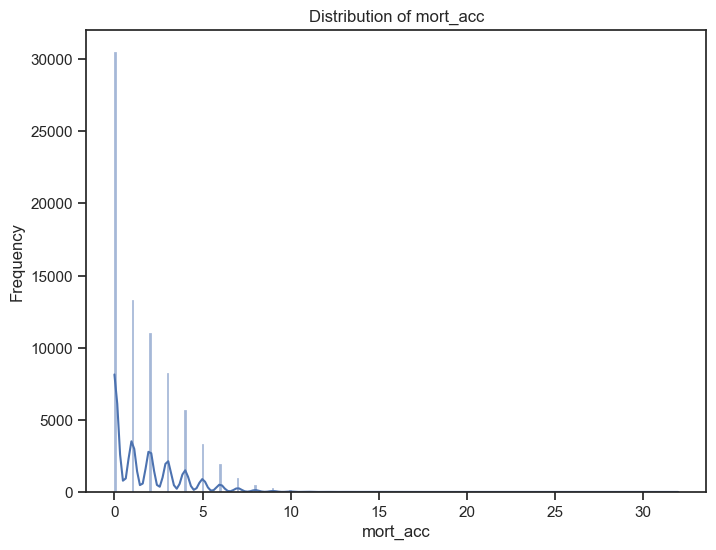

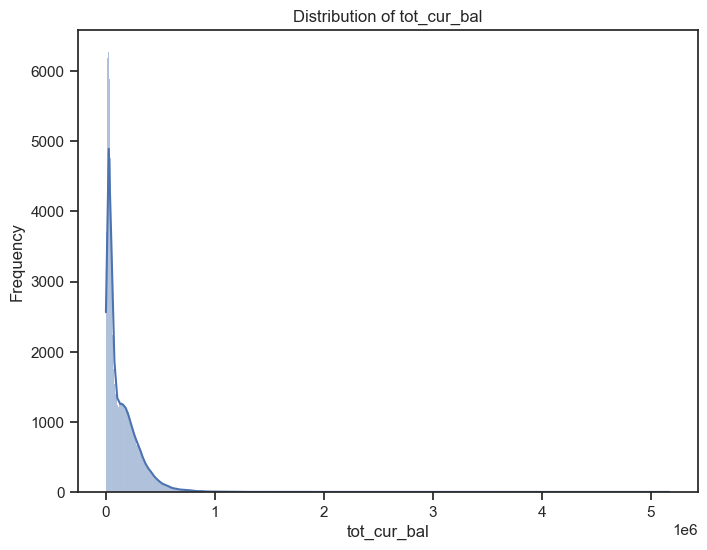

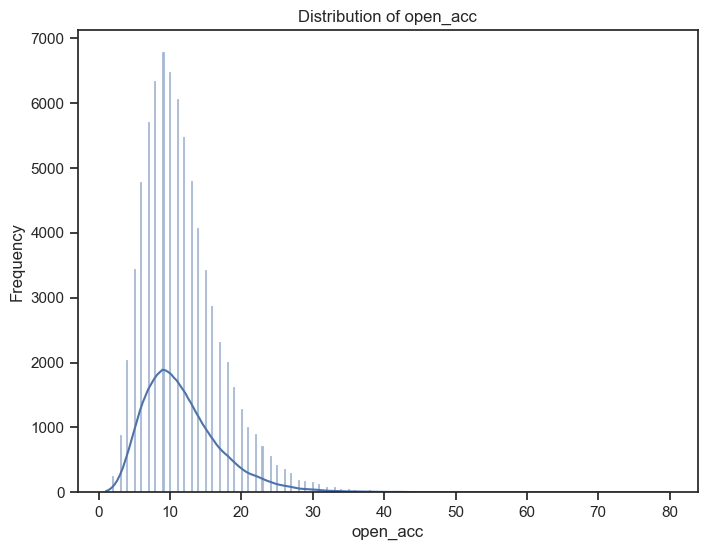

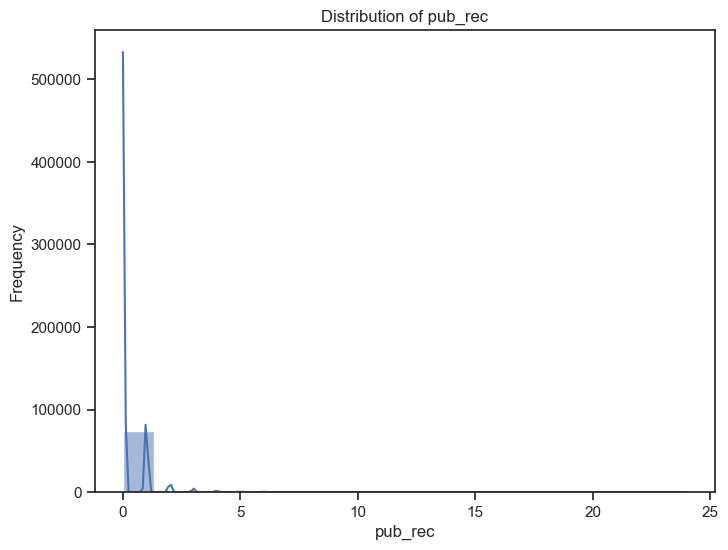

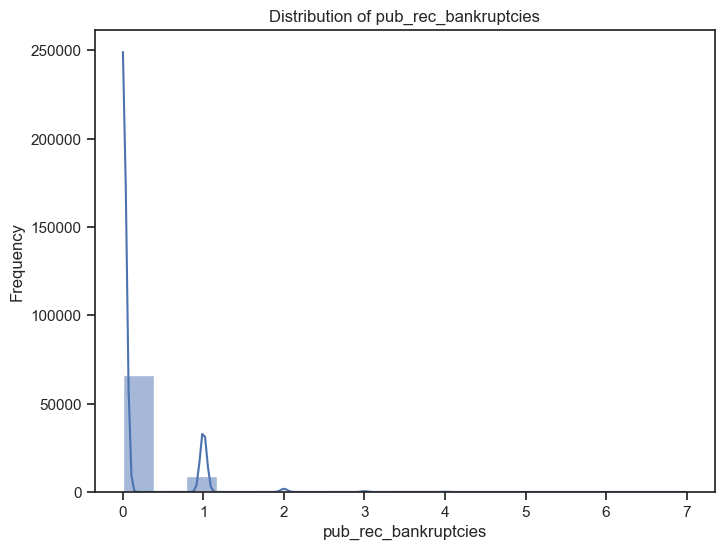

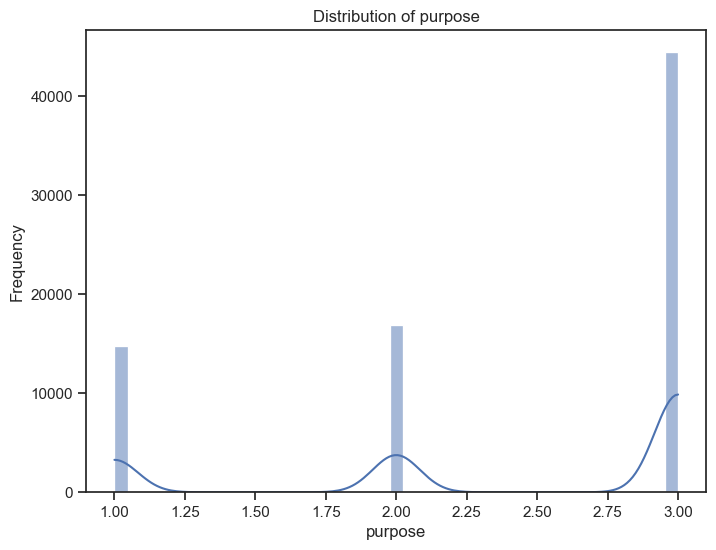

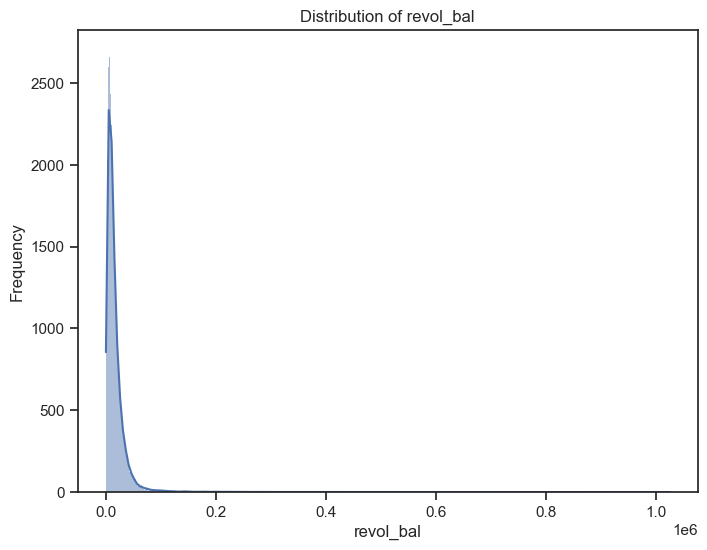

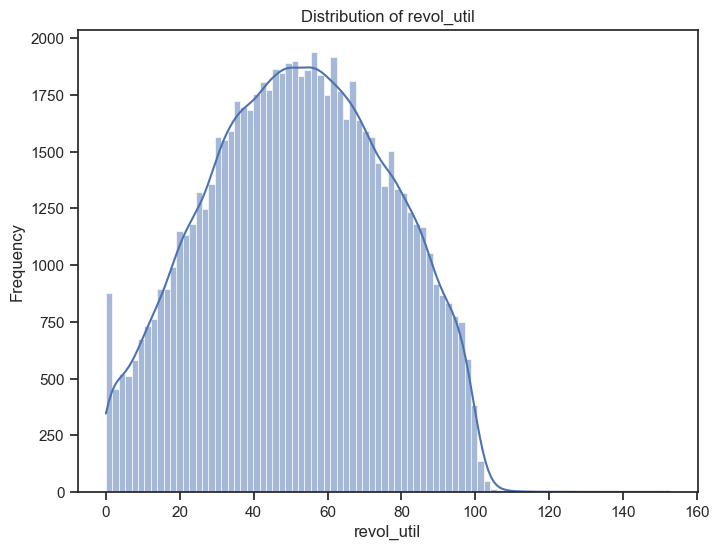

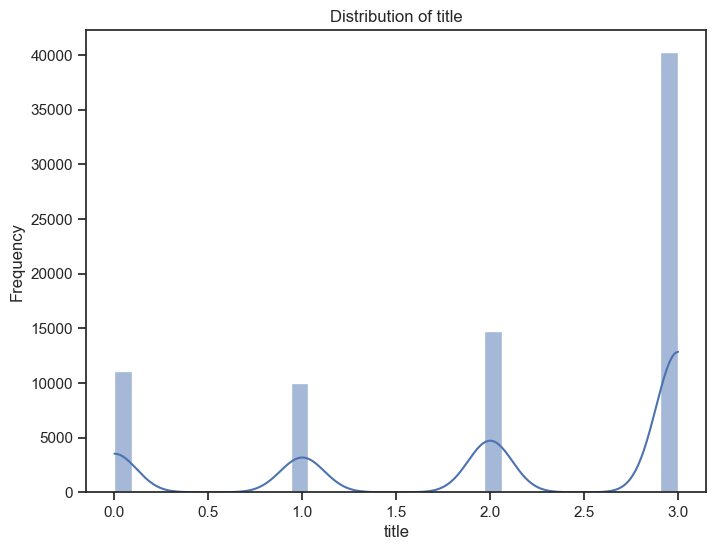

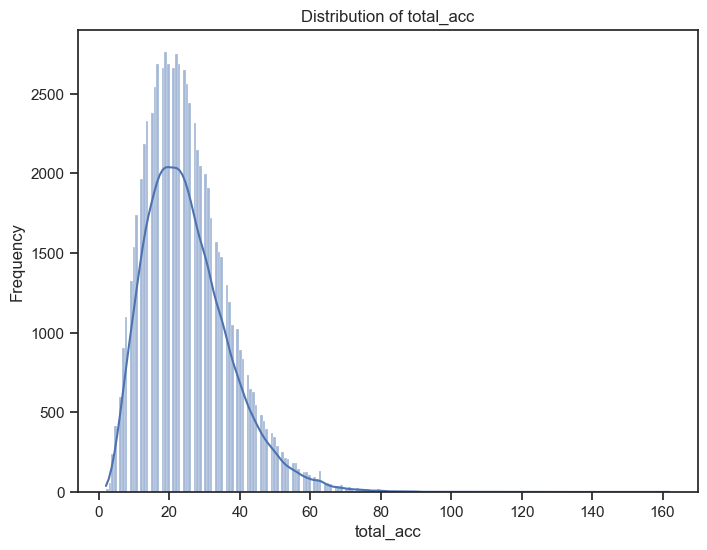

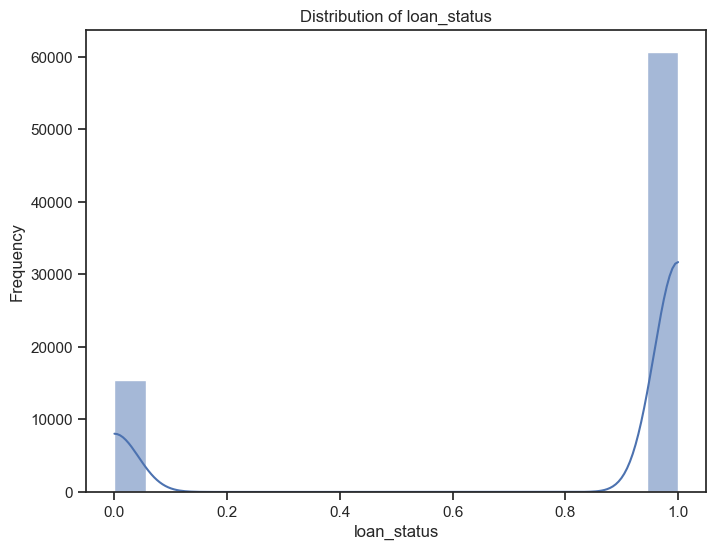

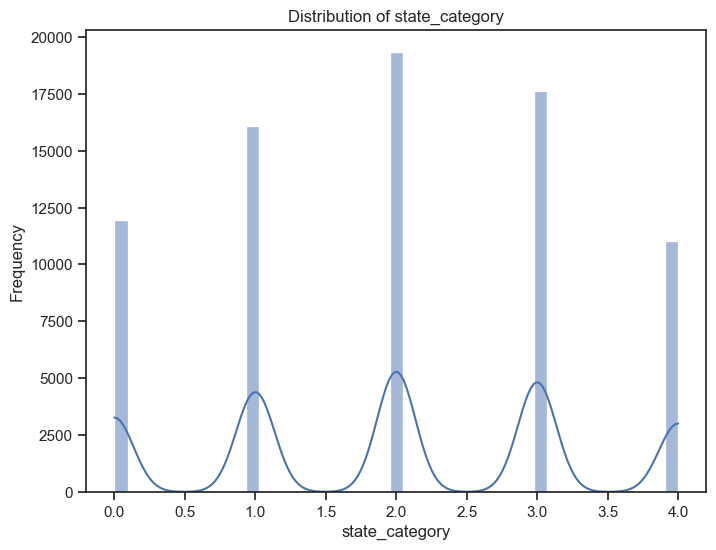

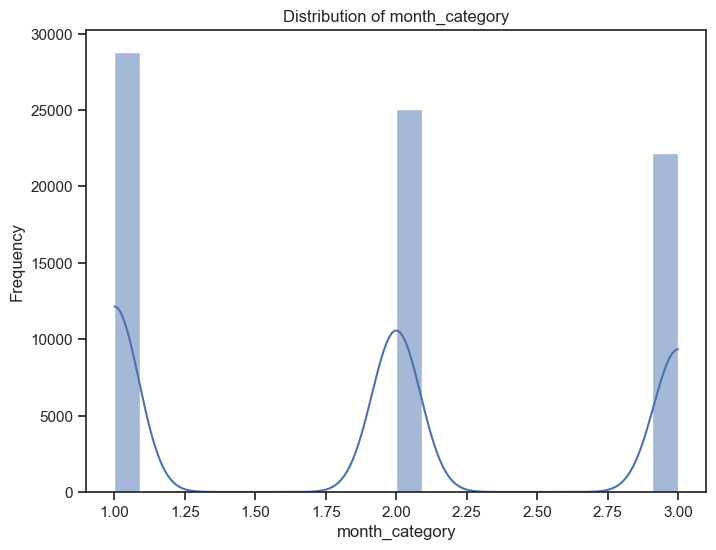

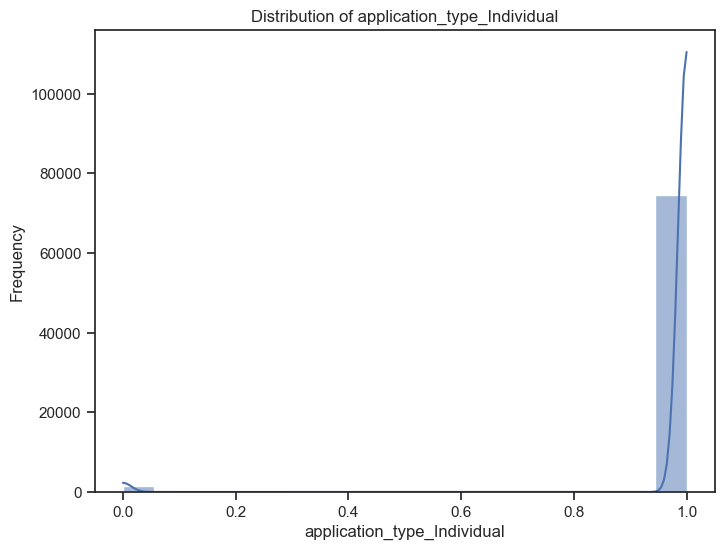

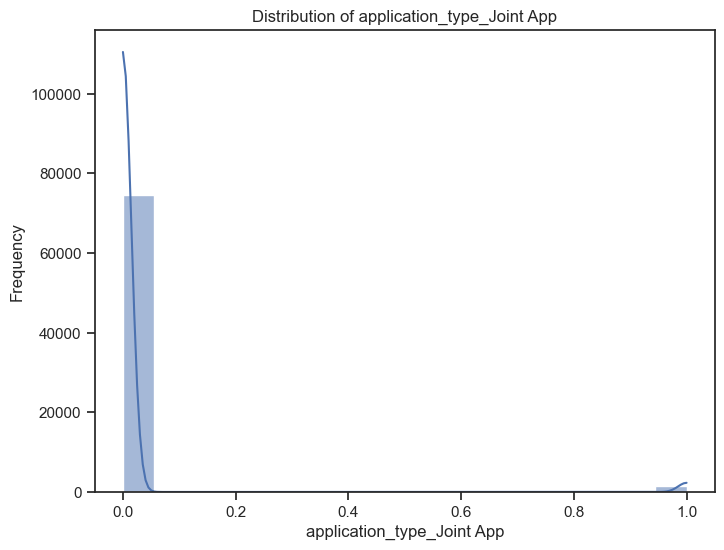

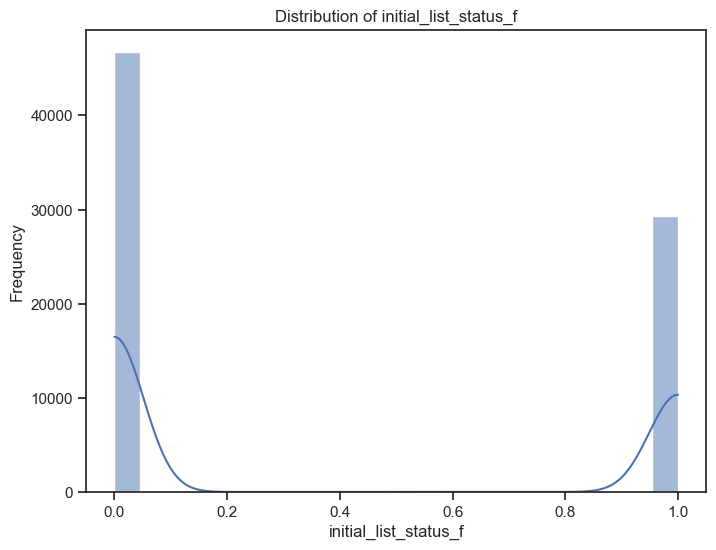

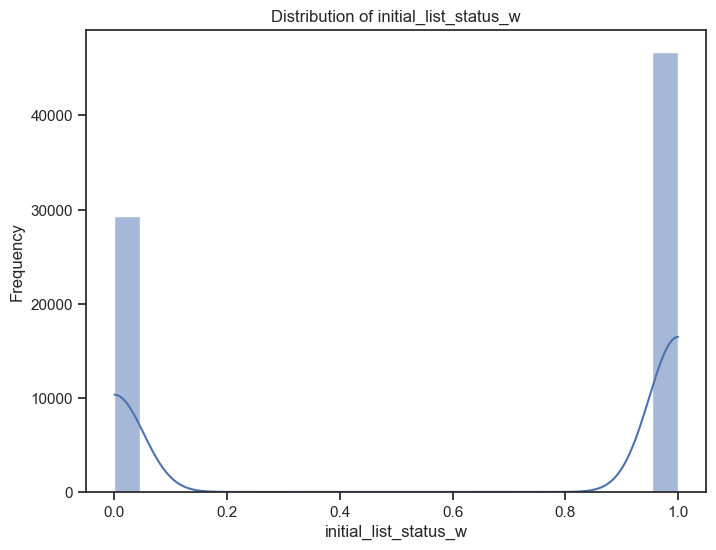

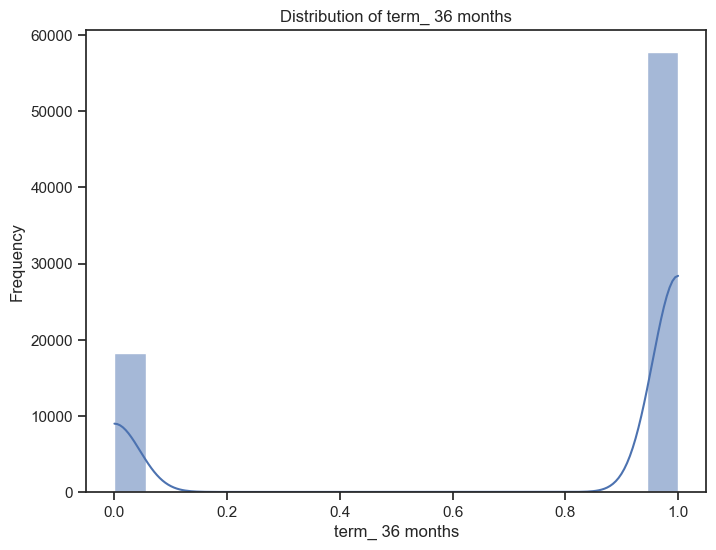

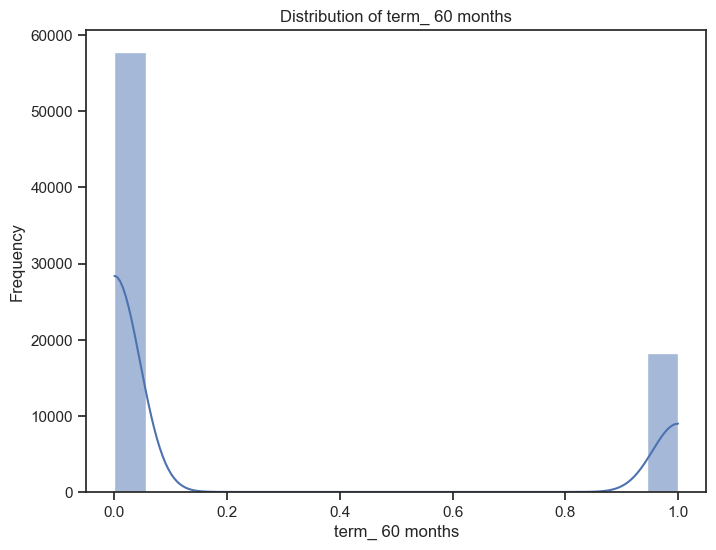

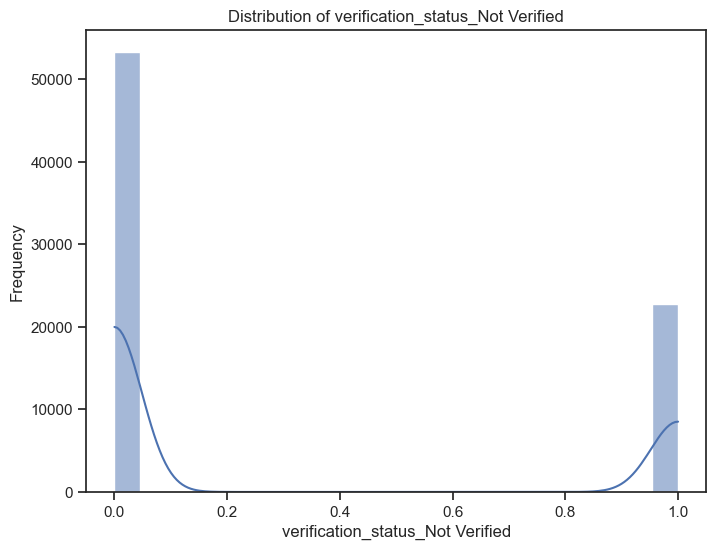

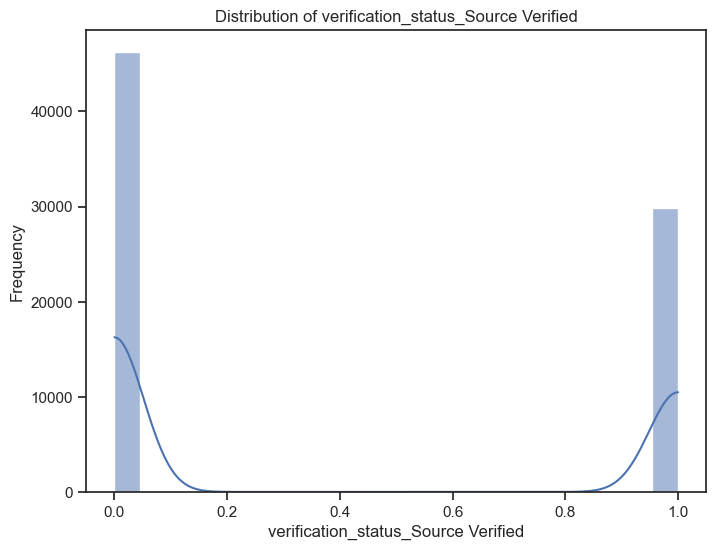

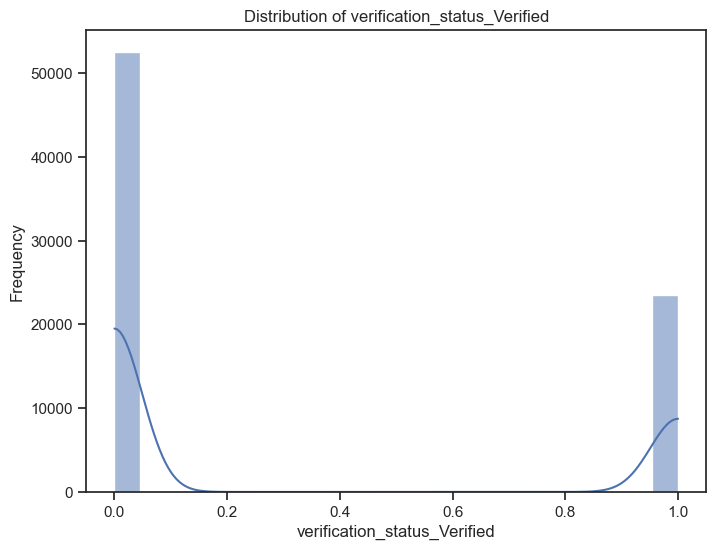

In [98]:
sns.set(style="ticks")

# Plot each feature
for column in t_data.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(t_data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

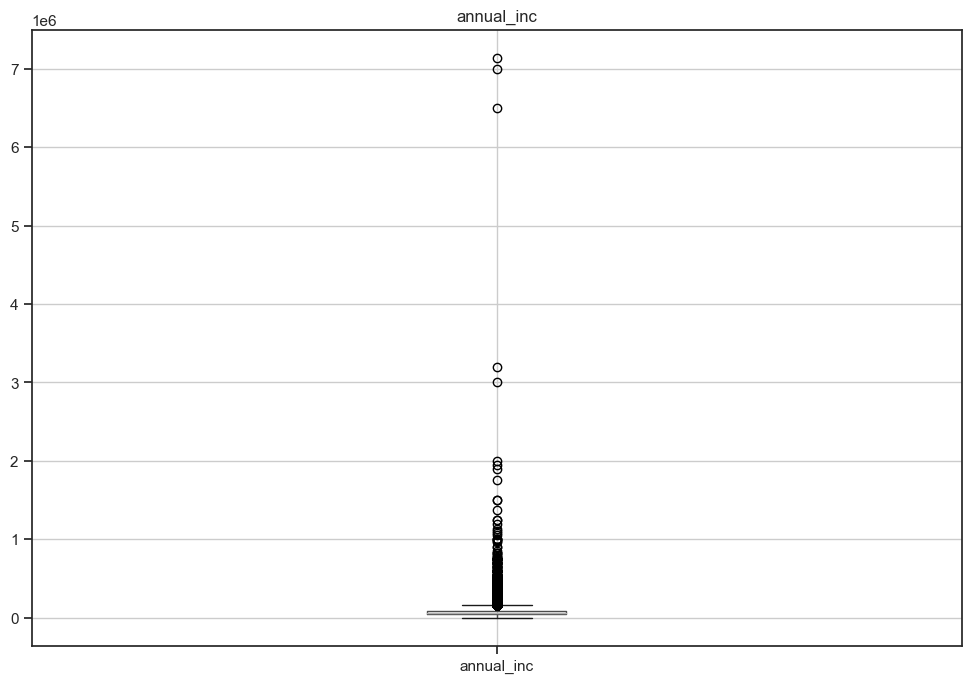

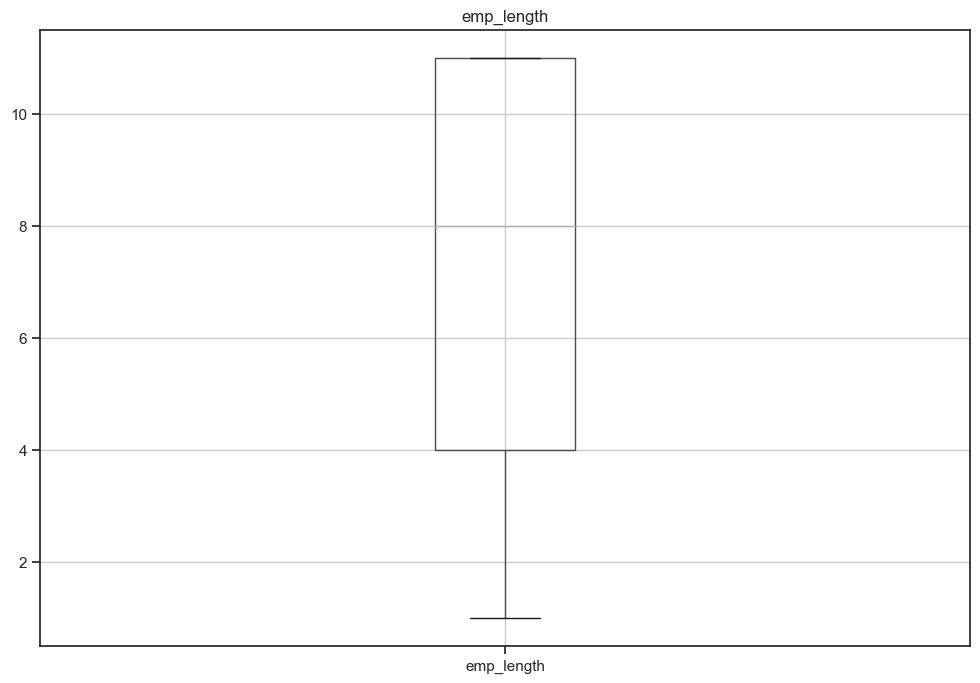

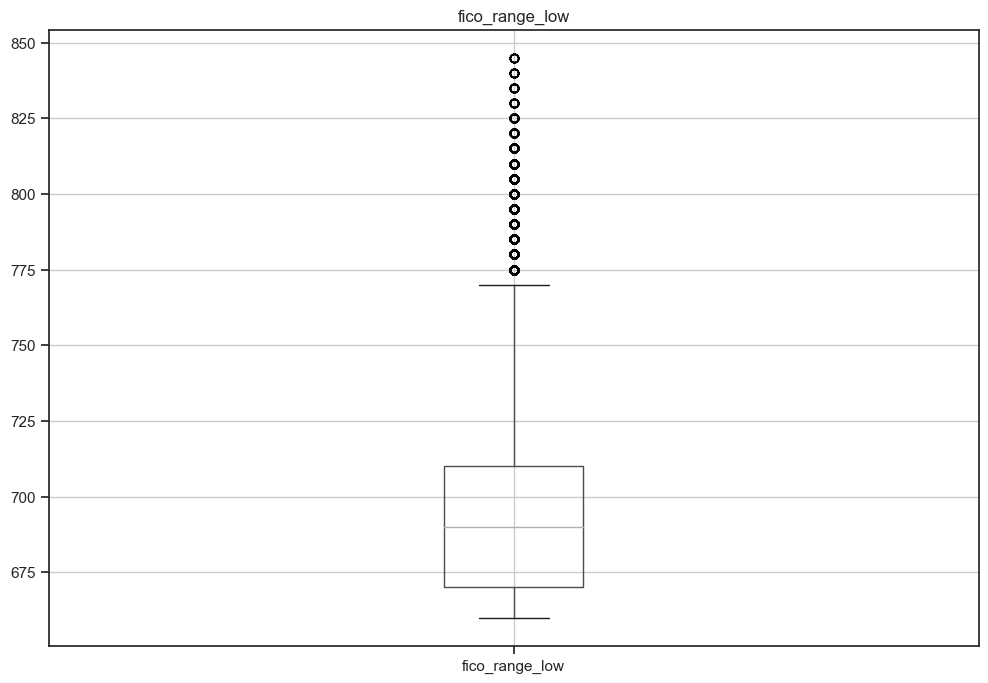

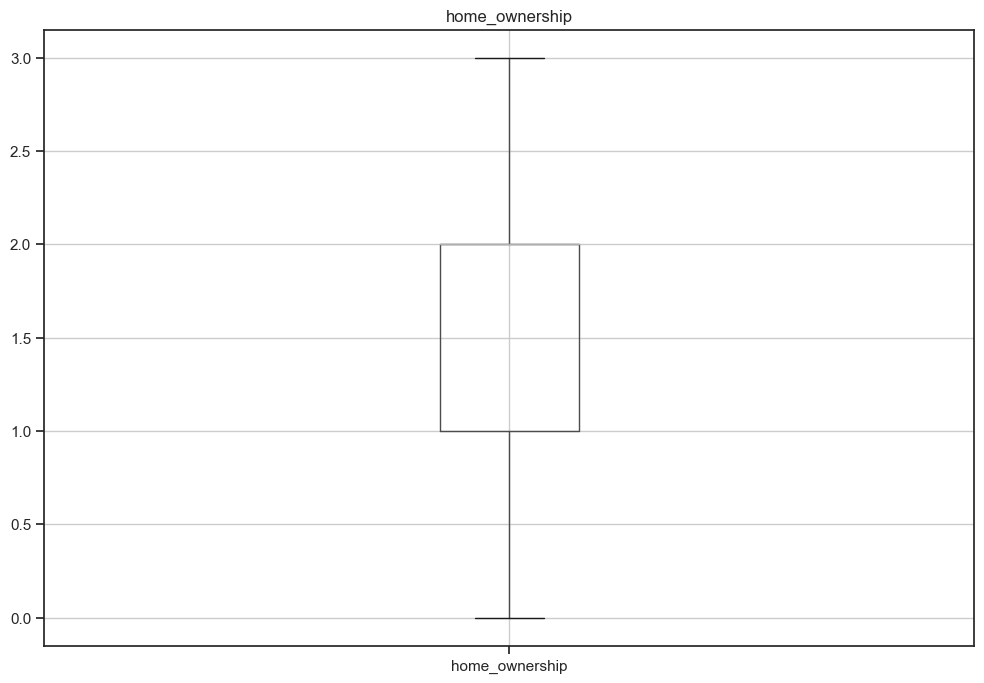

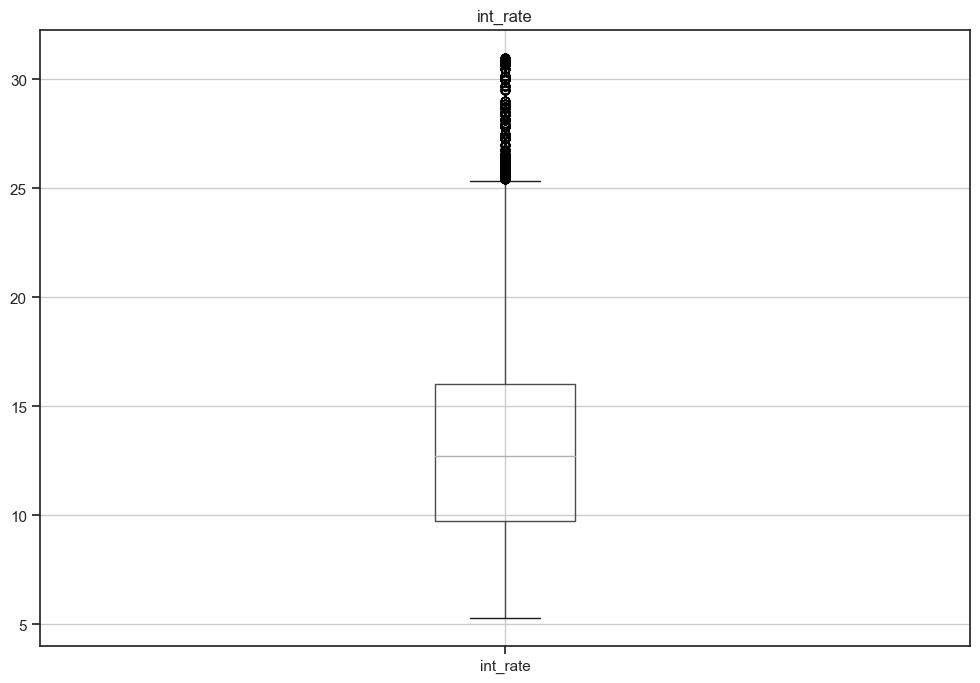

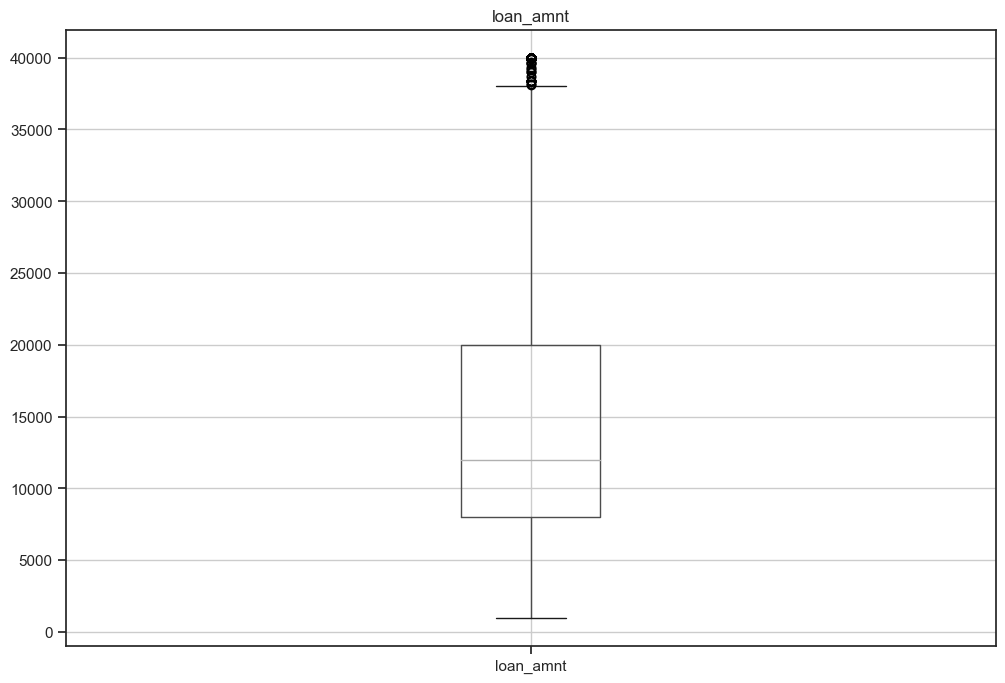

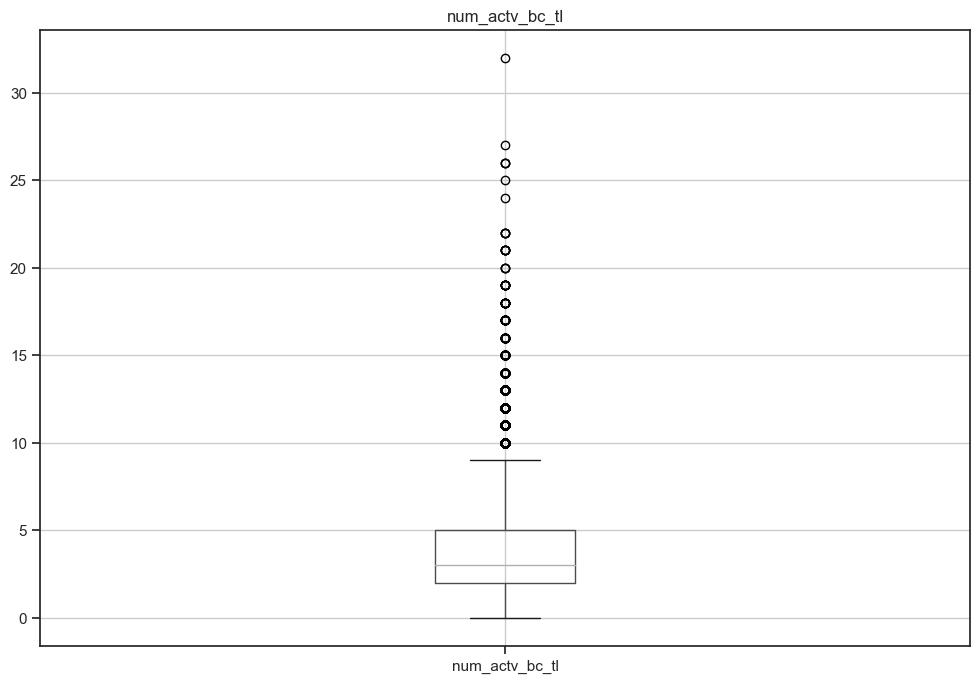

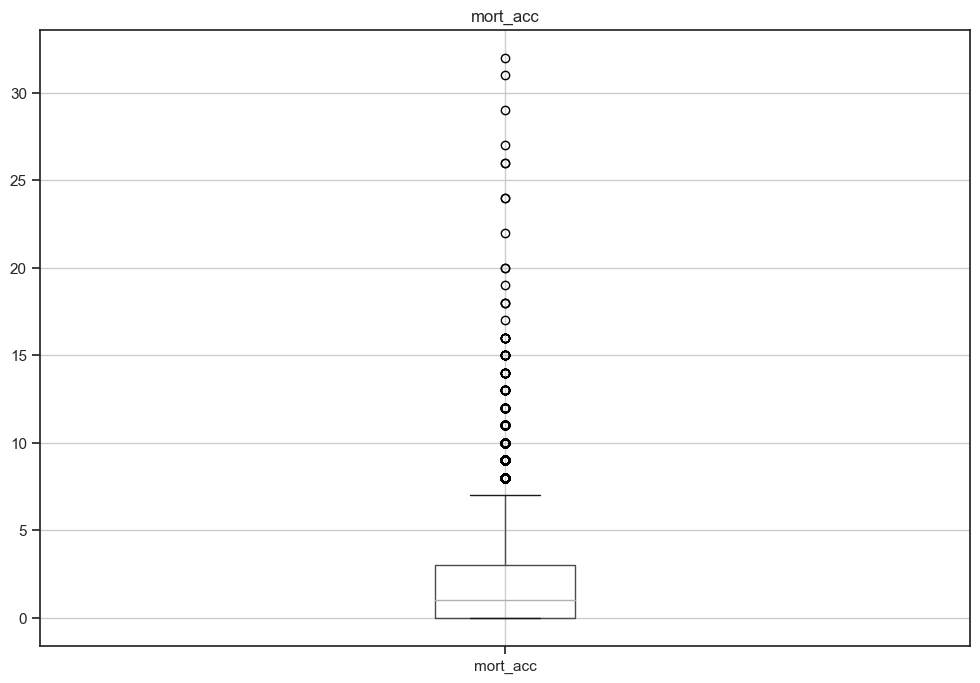

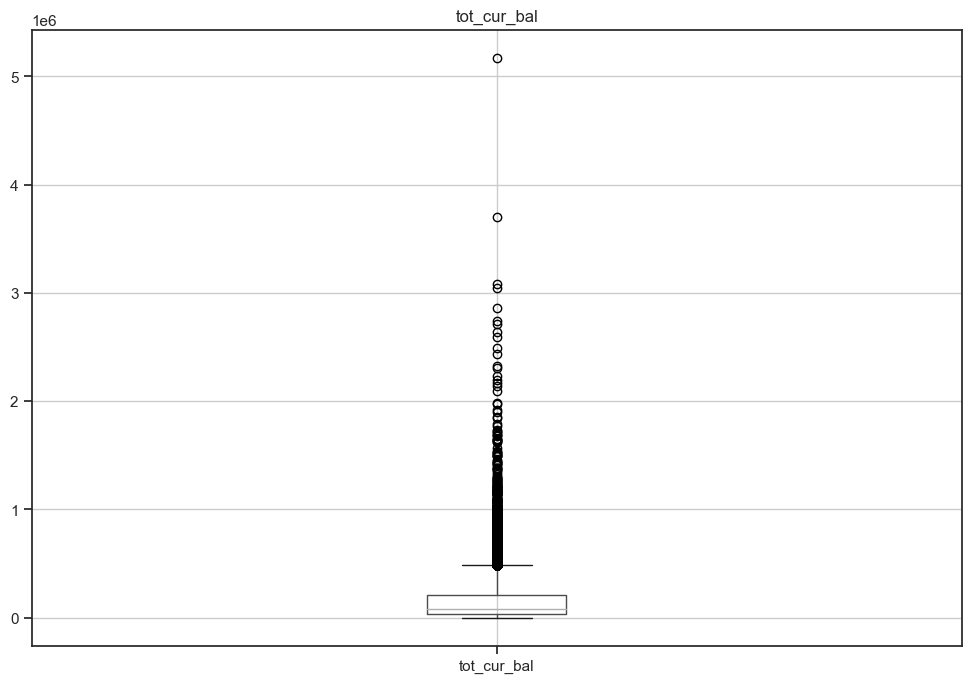

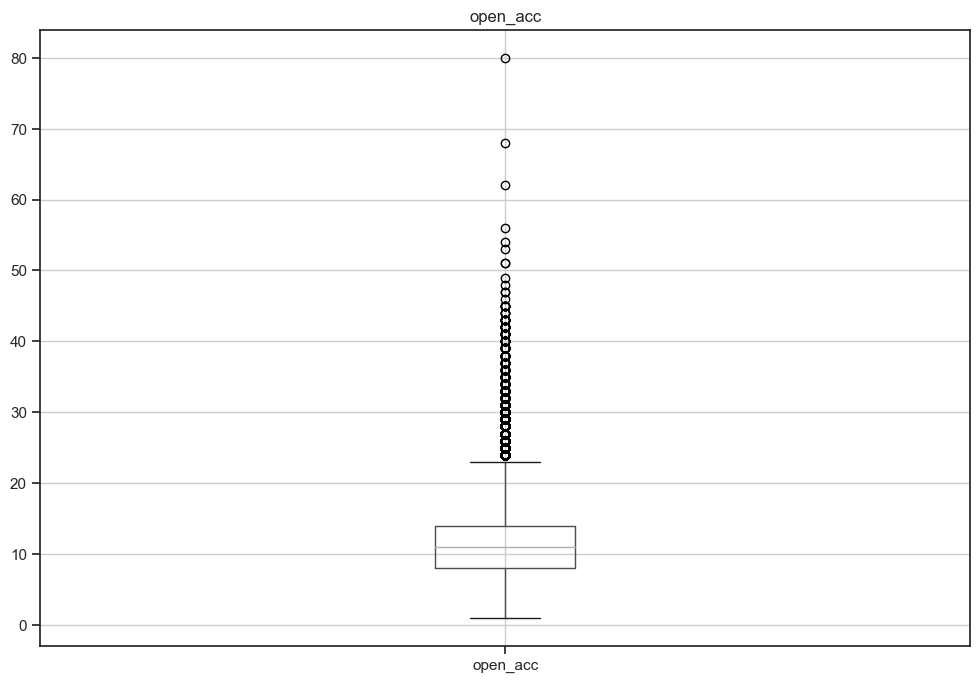

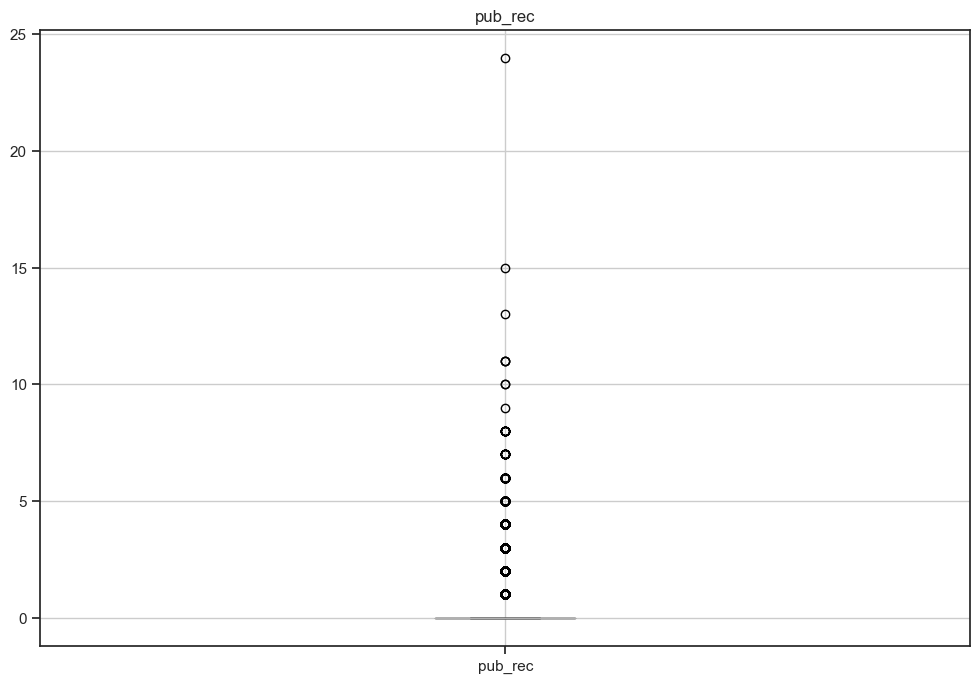

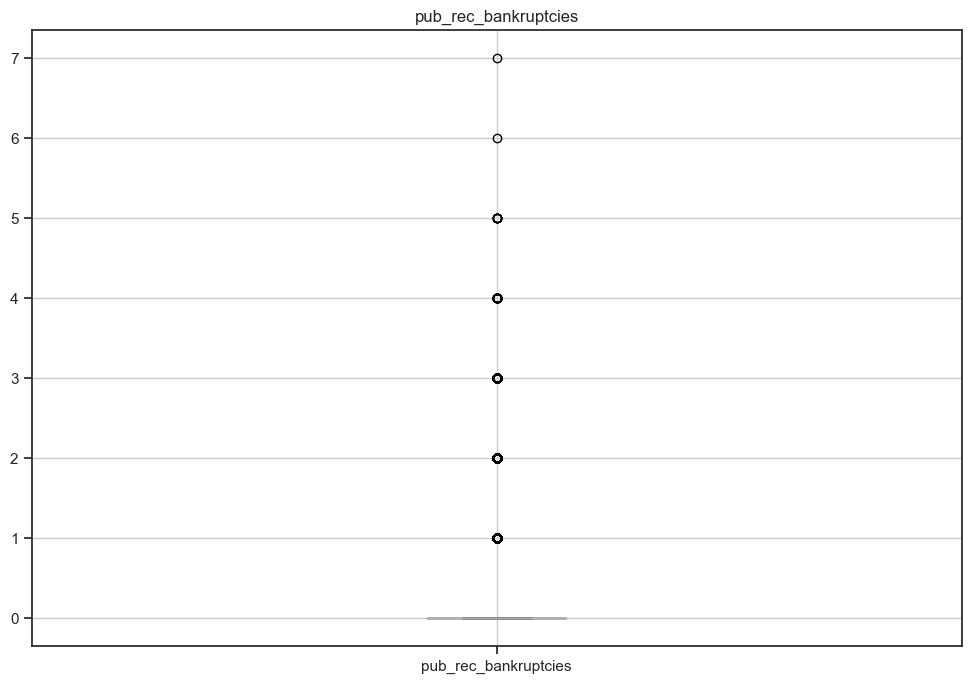

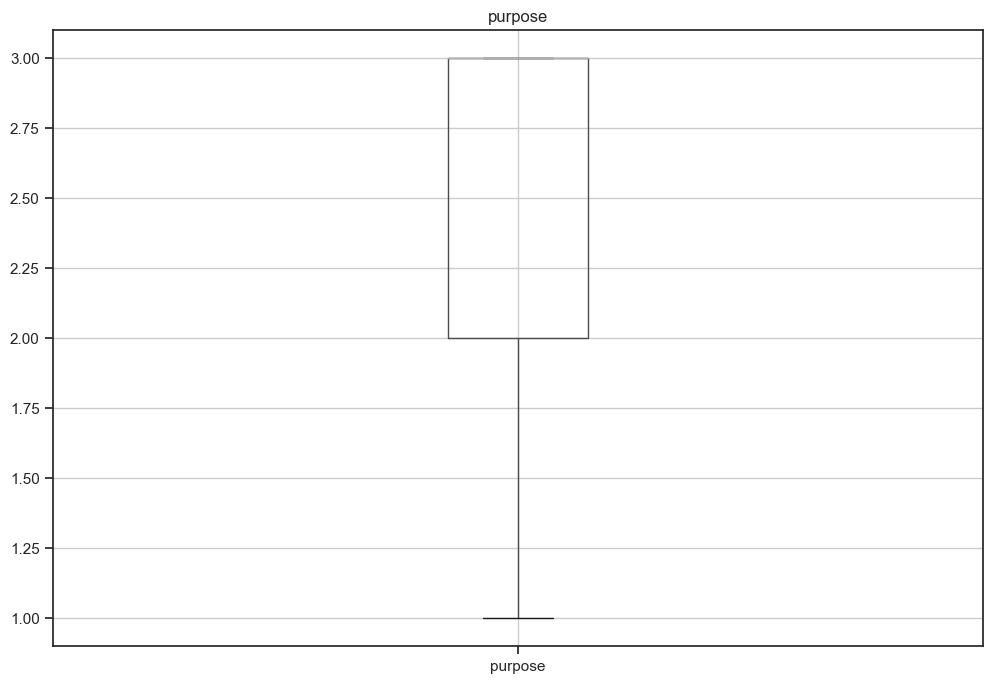

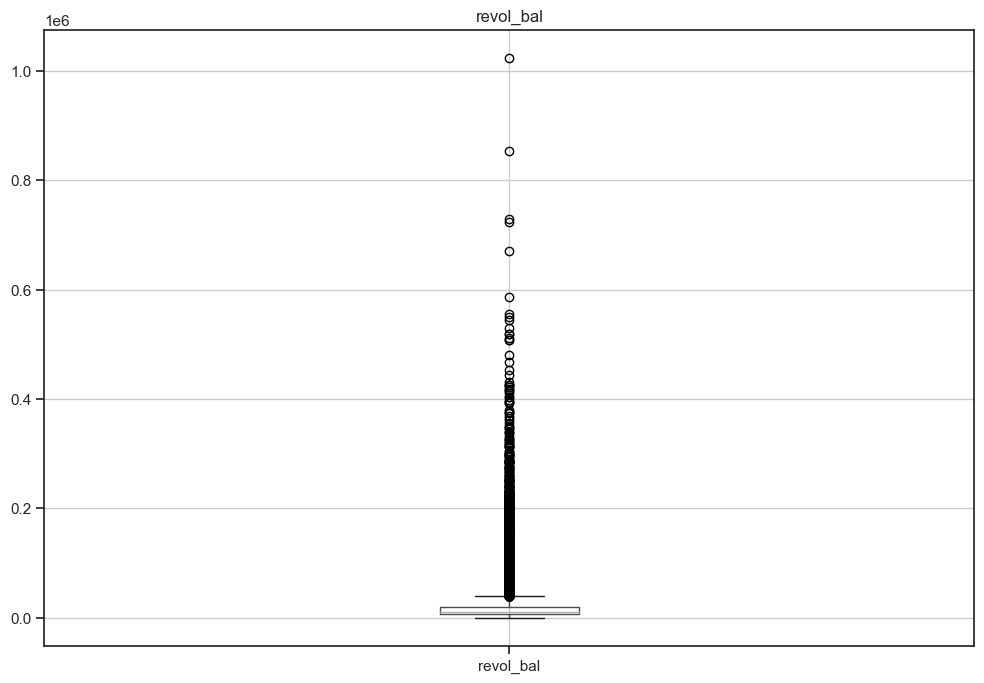

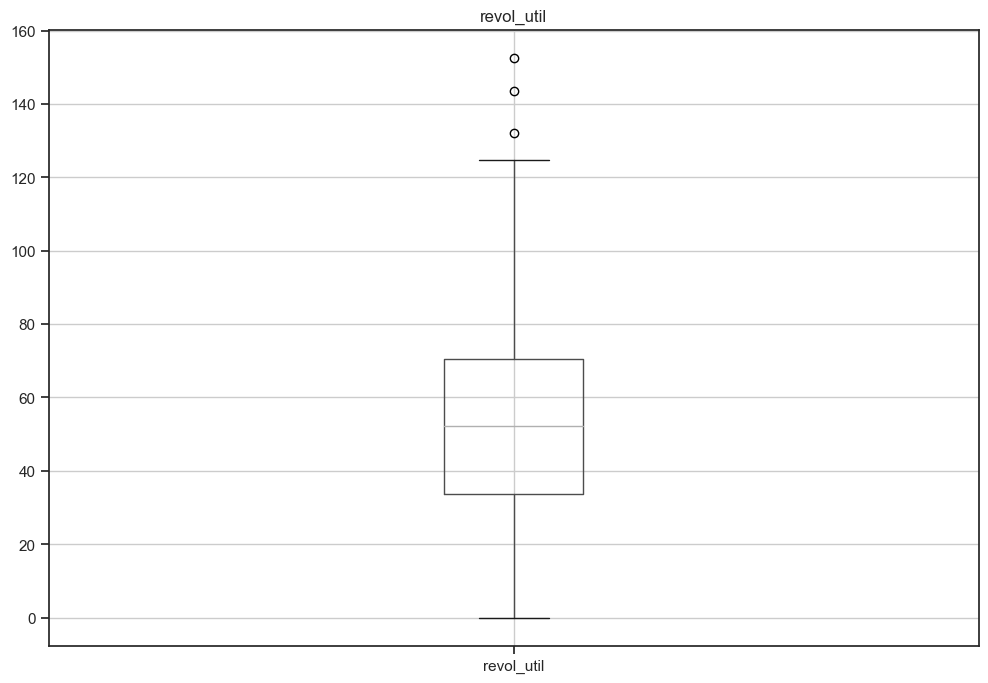

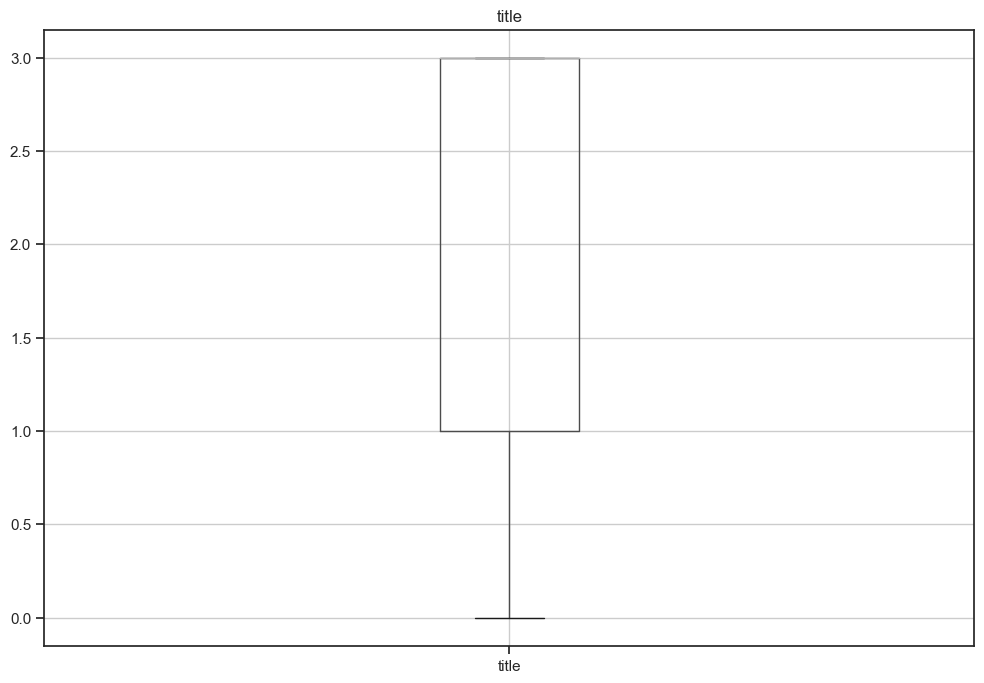

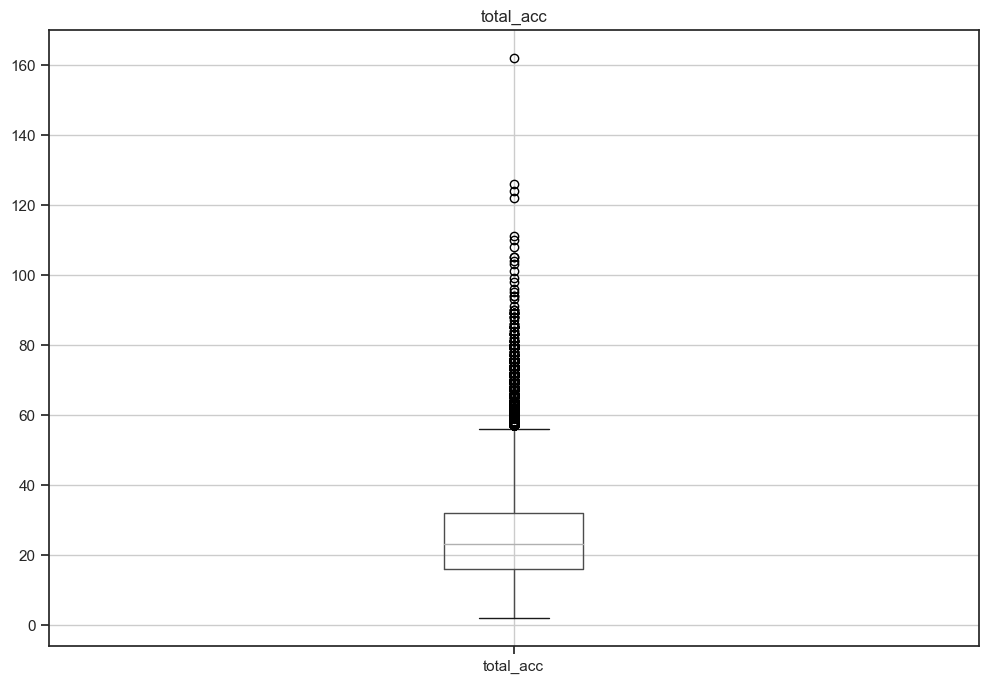

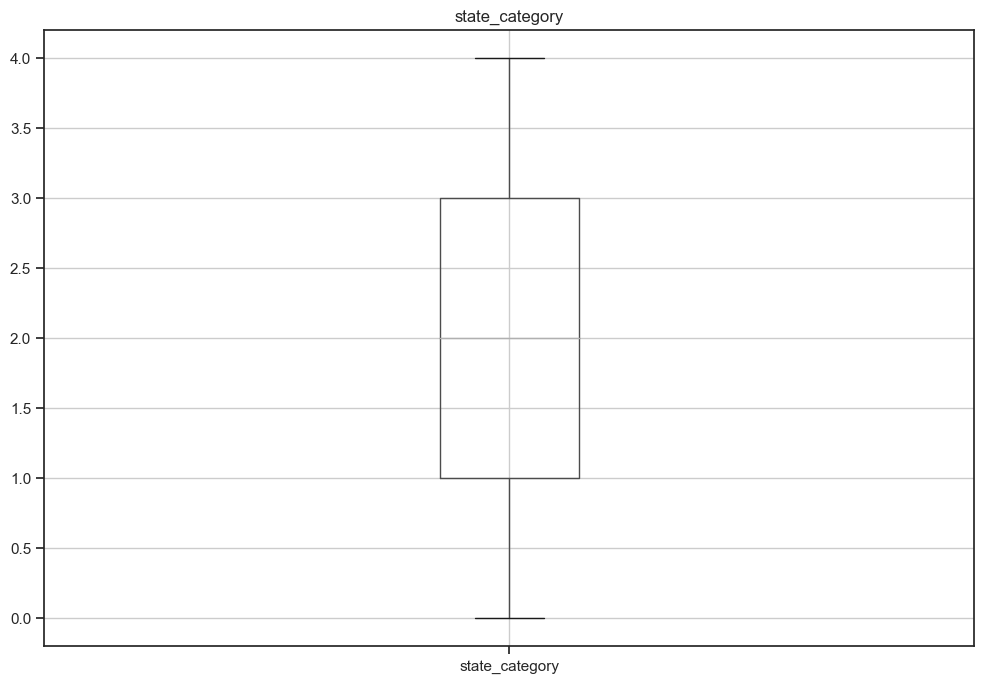

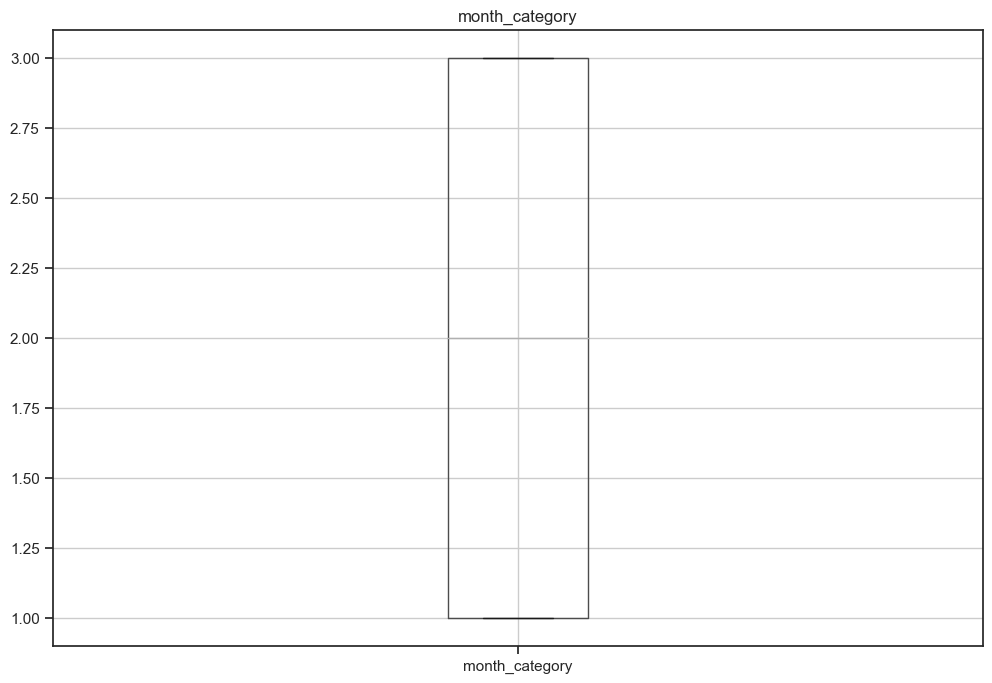

In [99]:
import matplotlib.pyplot as plt

# Plot box plots for each numeric column
numeric_columns = t_data.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    plt.figure(figsize=(12, 8))
    t_data.boxplot(column=[column])
    plt.title(column)
    plt.show()


In [89]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = t_data.drop(columns=['loan_status'])
y = t_data['loan_status']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Instantiate the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)


F1-score: 0.8888158375337862


In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on your training data
rf_classifier.fit(X_train, y_train)

# Predict loan status on the test set
rf_predictions = rf_classifier.predict(X_test)

# Evaluate the model's performance
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)


Random Forest Accuracy: 0.8009992768391295


In [92]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier on your training data
gb_classifier.fit(X_train, y_train)

# Predict loan status on the test set
gb_predictions = gb_classifier.predict(X_test)

# Evaluate the model's performance
gb_accuracy = accuracy_score(y_test, gb_predictions)
print("Gradient Boosting Accuracy:", gb_accuracy)


Gradient Boosting Accuracy: 0.8006705673525738


In [105]:
data = pd.read_csv("test_loan_data (1).csv")

In [108]:
data

,annual_inc,emp_length,fico_range_low,home_ownership,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,...,month_category,application_type_Individual,application_type_Joint App,initial_list_status_f,initial_list_status_w,term_ 36 months,term_ 60 months,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,50000.0,2.0,715.0,3,13.99,5000.0,1.0,0.0,33395.0,9.0,...,0,1,0,1,0,1,0,0,1,0
1,92000.0,11.0,680.0,1,10.99,30000.0,2.0,2.0,229832.0,11.0,...,0,1,0,1,0,1,0,0,1,0
2,89000.0,11.0,675.0,2,10.15,16000.0,5.0,2.0,181616.0,15.0,...,0,1,0,0,1,0,1,1,0,0
3,33000.0,10.0,670.0,1,13.68,10000.0,6.0,0.0,30603.0,12.0,...,0,1,0,1,0,1,0,1,0,0
4,35580.0,11.0,700.0,2,14.09,4000.0,2.0,4.0,124597.0,8.0,...,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,38500.0,5.0,675.0,1,17.57,10000.0,1.0,0.0,30397.0,10.0,...,0,1,0,0,1,1,0,1,0,0
19996,80000.0,4.0,670.0,2,18.92,18375.0,2.0,5.0,494439.0,9.0,...,0,1,0,1,0,0,1,0,1,0
19997,95000.0,11.0,725.0,2,11.22,35000.0,2.0,4.0,284915.0,10.0,...,0,1,0,1,0,1,0,0,1,0
19998,35000.0,11.0,805.0,2,7.89,5000.0,1.0,0.0,8205.0,9.0,...,0,1,0,0,1,1,0,1,0,0


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18989 entries, 0 to 19999
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   annual_inc                           18989 non-null  float64
 1   emp_length                           18989 non-null  float64
 2   fico_range_low                       18989 non-null  float64
 3   home_ownership                       18989 non-null  int64  
 4   int_rate                             18989 non-null  float64
 5   loan_amnt                            18989 non-null  float64
 6   num_actv_bc_tl                       18989 non-null  float64
 7   mort_acc                             18989 non-null  float64
 8   tot_cur_bal                          18989 non-null  float64
 9   open_acc                             18989 non-null  float64
 10  pub_rec                              18989 non-null  float64
 11  pub_rec_bankruptcies             

In [110]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76052 entries, 0 to 79999
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   annual_inc                           76052 non-null  float64
 1   emp_length                           76052 non-null  float64
 2   fico_range_low                       76052 non-null  int64  
 3   home_ownership                       76052 non-null  int64  
 4   int_rate                             76052 non-null  float64
 5   loan_amnt                            76052 non-null  int64  
 6   num_actv_bc_tl                       76052 non-null  float64
 7   mort_acc                             76052 non-null  float64
 8   tot_cur_bal                          76052 non-null  float64
 9   open_acc                             76052 non-null  int64  
 10  pub_rec                              76052 non-null  int64  
 11  pub_rec_bankruptcies             

In [113]:
predictions = model.predict(data)

In [115]:
data['predictions']=predictions

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18989 entries, 0 to 19999
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   annual_inc                           18989 non-null  float64
 1   emp_length                           18989 non-null  float64
 2   fico_range_low                       18989 non-null  float64
 3   home_ownership                       18989 non-null  int64  
 4   int_rate                             18989 non-null  float64
 5   loan_amnt                            18989 non-null  float64
 6   num_actv_bc_tl                       18989 non-null  float64
 7   mort_acc                             18989 non-null  float64
 8   tot_cur_bal                          18989 non-null  float64
 9   open_acc                             18989 non-null  float64
 10  pub_rec                              18989 non-null  float64
 11  pub_rec_bankruptcies             